In [2]:

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
import mglearn



from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler,  Normalizer ,RobustScaler
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics.cluster import completeness_score

from sklearn.cluster import KMeans 

from sklearn import manifold, decomposition
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import make_scorer

import umap


from string import punctuation
import nltk 
from nltk.corpus import stopwords      
from nltk.stem import WordNetLemmatizer
from nltk import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Activation
from keras.models import clone_model

from ipywidgets import IntProgress
from ipywidgets import Text
from IPython.display import display
from IPython.display import Image

from scipy.ndimage import gaussian_filter
from PIL import Image as Image_PIL

import time

In [3]:
df = pd.read_csv("flipkart_com_ecommerce_sample_1050.csv",sep=',', index_col = 'uniq_id',encoding ='utf-8')

In [4]:
df.shape

(1050, 14)

In [5]:
df.head(2)

crawl_timestamp  \
uniq_id                                                       
55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   

                                                                        product_url  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  http://www.flipkart.com/elegance-polyester-mul...   
7b72c92c2f6c40268628ec5f14c6d590  http://www.flipkart.com/sathiyas-cotton-bath-t...   

                                                                       product_name  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Elegance Polyester Multicolor Abstract Eyelet ...   
7b72c92c2f6c40268628ec5f14c6d590                         Sathiyas Cotton Bath Towel   

                                                              product_category_tree  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  ["Home Furnishing >> Curtains & Accessories >>...   
7b72c92c2f6c40268628ec5f14c6d590  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   

                                               pid  retail_price  \
uniq_id                                                            
55b85ea15a1536d46b7190ad6fff8ce7  CRNEG7BKMFFYHQ8Z        1899.0   
7b72c92c2f6c40268628ec5f14c6d590  BTWEGFZHGBXPHZUH         600.0   

                                  discounted_price  \
uniq_id                                              
55b85ea15a1536d46b7190ad6fff8ce7             899.0   
7b72c92c2f6c40268628ec5f14c6d590             449.0   

                                                                 image  \
uniq_id                                                                  
55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   

                                  is_FK_Advantage_product  \
uniq_id                                                     
55b85ea15a1536d46b7190ad6fff8ce7                    False   
7b72c92c2f6c40268628ec5f14c6d590                    False   

                                                                        description  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Key Features of Elegance Polyester Multicolor ...   
7b72c92c2f6c40268628ec5f14c6d590  Specifications of Sathiyas Cotton Bath Towel (...   

                                       product_rating       overall_rating  \
uniq_id                                                                      
55b85ea15a1536d46b7190ad6fff8ce7  No rating available  No rating available   
7b72c92c2f6c40268628ec5f14c6d590  No rating available  No rating available   

                                     brand  \
uniq_id                                      
55b85ea15a1536d46b7190ad6fff8ce7  Elegance   
7b72c92c2f6c40268628ec5f14c6d590  Sathiyas   

                                                             product_specifications  
uniq_id                                                                              
55b85ea15a1536d46b7190ad6fff8ce7  {"product_specification"=>[{"key"=>"Brand", "v...  
7b72c92c2f6c40268628ec5f14c6d590  {"product_specification"=>[{"key"=>"Machine Wa...

In [6]:
df.columns

Index(['crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [7]:

df.isna().sum()

crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [8]:
df.iloc[0,:]

crawl_timestamp                                    2016-04-30 03:22:56 +0000
product_url                http://www.flipkart.com/elegance-polyester-mul...
product_name               Elegance Polyester Multicolor Abstract Eyelet ...
product_category_tree      ["Home Furnishing >> Curtains & Accessories >>...
pid                                                         CRNEG7BKMFFYHQ8Z
retail_price                                                          1899.0
discounted_price                                                       899.0
image                                   55b85ea15a1536d46b7190ad6fff8ce7.jpg
is_FK_Advantage_product                                                False
description                Key Features of Elegance Polyester Multicolor ...
product_rating                                           No rating available
overall_rating                                           No rating available
brand                                                               Elegance

In [9]:
data= df.copy()
data.head()

crawl_timestamp  \
uniq_id                                                       
55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                                                        product_url  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  http://www.flipkart.com/elegance-polyester-mul...   
7b72c92c2f6c40268628ec5f14c6d590  http://www.flipkart.com/sathiyas-cotton-bath-t...   
64d5d4a258243731dc7bbb1eef49ad74  http://www.flipkart.com/eurospa-cotton-terry-f...   
d4684dcdc759dd9cdf41504698d737d8  http://www.flipkart.com/santosh-royal-fashion-...   
6325b6870c54cd47be6ebfbffa620ec7  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                                                       product_name  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Elegance Polyester Multicolor Abstract Eyelet ...   
7b72c92c2f6c40268628ec5f14c6d590                         Sathiyas Cotton Bath Towel   
64d5d4a258243731dc7bbb1eef49ad74                Eurospa Cotton Terry Face Towel Set   
d4684dcdc759dd9cdf41504698d737d8  SANTOSH ROYAL FASHION Cotton Printed King size...   
6325b6870c54cd47be6ebfbffa620ec7  Jaipur Print Cotton Floral King sized Double B...   

                                                              product_category_tree  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  ["Home Furnishing >> Curtains & Accessories >>...   
7b72c92c2f6c40268628ec5f14c6d590  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
64d5d4a258243731dc7bbb1eef49ad74  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   
d4684dcdc759dd9cdf41504698d737d8  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   
6325b6870c54cd47be6ebfbffa620ec7  ["Home Furnishing >> Bed Linen >> Bedsheets >>...   

                                               pid  retail_price  \
uniq_id                                                            
55b85ea15a1536d46b7190ad6fff8ce7  CRNEG7BKMFFYHQ8Z        1899.0   
7b72c92c2f6c40268628ec5f14c6d590  BTWEGFZHGBXPHZUH         600.0   
64d5d4a258243731dc7bbb1eef49ad74  BTWEG6SHXTDB2A2Y           NaN   
d4684dcdc759dd9cdf41504698d737d8  BDSEJT9UQWHDUBH4        2699.0   
6325b6870c54cd47be6ebfbffa620ec7  BDSEJTHNGWVGWWQU        2599.0   

                                  discounted_price  \
uniq_id                                              
55b85ea15a1536d46b7190ad6fff8ce7             899.0   
7b72c92c2f6c40268628ec5f14c6d590             449.0   
64d5d4a258243731dc7bbb1eef49ad74               NaN   
d4684dcdc759dd9cdf41504698d737d8            1299.0   
6325b6870c54cd47be6ebfbffa620ec7             698.0   

                                                                 image  \
uniq_id                                                                  
55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   
64d5d4a258243731dc7bbb1eef49ad74  64d5d4a258243731dc7bbb1eef49ad74.jpg   
d4684dcdc759dd9cdf41504698d737d8  d4684dcdc759dd9cdf41504698d737d8.jpg   
6325b6870c54cd47be6ebfbffa620ec7  6325b6870c54cd47be6ebfbffa620ec7.jpg   

                                  is_FK_Advantage_product  \
uniq_id                                                     
55b85ea15a1536d46b7190ad6fff8ce7                    False   
7b72c92c2f6c40268628ec5f14c6d590                    False   
64d5d4a258243731dc7bbb1eef49ad74                    False   
d4684dcdc759dd9cdf41504698d737d8                    False   
6325b6870c54cd47be6ebfbffa620ec

### Nettoyage catégories

In [10]:
data['product_category_tree'].nunique()

642

In [11]:
data["cat_1"] = data["product_category_tree"].str.split('>>').str[0].str[2:]
data["cat_2"] = data["product_category_tree"].str.split('>>').str[0].str[2:] + data["product_category_tree"].str.split('>>').str[1]
data["cat_3"] = data["product_category_tree"].str.split('>>').str[0].str[2:] + data["product_category_tree"].str.split('>>').str[1] + data["product_category_tree"].str.split('>>').str[2]

In [12]:
data.head(2)

crawl_timestamp  \
uniq_id                                                       
55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   

                                                                        product_url  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  http://www.flipkart.com/elegance-polyester-mul...   
7b72c92c2f6c40268628ec5f14c6d590  http://www.flipkart.com/sathiyas-cotton-bath-t...   

                                                                       product_name  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Elegance Polyester Multicolor Abstract Eyelet ...   
7b72c92c2f6c40268628ec5f14c6d590                         Sathiyas Cotton Bath Towel   

                                                              product_category_tree  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  ["Home Furnishing >> Curtains & Accessories >>...   
7b72c92c2f6c40268628ec5f14c6d590  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...   

                                               pid  retail_price  \
uniq_id                                                            
55b85ea15a1536d46b7190ad6fff8ce7  CRNEG7BKMFFYHQ8Z        1899.0   
7b72c92c2f6c40268628ec5f14c6d590  BTWEGFZHGBXPHZUH         600.0   

                                  discounted_price  \
uniq_id                                              
55b85ea15a1536d46b7190ad6fff8ce7             899.0   
7b72c92c2f6c40268628ec5f14c6d590             449.0   

                                                                 image  \
uniq_id                                                                  
55b85ea15a1536d46b7190ad6fff8ce7  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
7b72c92c2f6c40268628ec5f14c6d590  7b72c92c2f6c40268628ec5f14c6d590.jpg   

                                  is_FK_Advantage_product  \
uniq_id                                                     
55b85ea15a1536d46b7190ad6fff8ce7                    False   
7b72c92c2f6c40268628ec5f14c6d590                    False   

                                                                        description  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  Key Features of Elegance Polyester Multicolor ...   
7b72c92c2f6c40268628ec5f14c6d590  Specifications of Sathiyas Cotton Bath Towel (...   

                                       product_rating       overall_rating  \
uniq_id                                                                      
55b85ea15a1536d46b7190ad6fff8ce7  No rating available  No rating available   
7b72c92c2f6c40268628ec5f14c6d590  No rating available  No rating available   

                                     brand  \
uniq_id                                      
55b85ea15a1536d46b7190ad6fff8ce7  Elegance   
7b72c92c2f6c40268628ec5f14c6d590  Sathiyas   

                                                             product_specifications  \
uniq_id                                                                               
55b85ea15a1536d46b7190ad6fff8ce7  {"product_specification"=>[{"key"=>"Brand", "v...   
7b72c92c2f6c40268628ec5f14c6d590  {"product_specification"=>[{"key"=>"Machine Wa...   

                                             cat_1  \
uniq_id                                              
55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing    
7b72c92c2f6c40268628ec5f14c6d590        Baby Care    

                                                                     cat_2  \
uniq_id                                                                      
55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing  Curtains & Accessories    
7b72c92c2f6c40268628ec5f14c6d590              Baby Care  Baby Bat

In [13]:
data["cat_1"].value_counts()

Home Furnishing                150
Baby Care                      150
Watches                        150
Home Decor & Festive Needs     150
Kitchen & Dining               150
Beauty and Personal Care       150
Computers                      150
Name: cat_1, dtype: int64

In [14]:
data["cat_2"].value_counts()

Watches  Wrist Watches                                           149
Computers  Laptop Accessories                                     87
Baby Care  Infant Wear                                            84
Kitchen & Dining  Coffee Mugs                                     74
Home Decor & Festive Needs  Showpieces                            71
                                                                ... 
Home Decor & Festive Needs  Candles & Fragrances                   1
Kitchen & Dining  Consumables & Disposables                        1
Home Furnishing  JMD Home Furnishing                               1
Home Decor & Festive Needs  TRUE Home Decor & Festive Needs"]      1
Beauty and Personal Care  Beauty Accessories                       1
Name: cat_2, Length: 63, dtype: int64

In [15]:
data["cat_3"].value_counts()

Beauty and Personal Care  Fragrances  Deodorants               65
Home Furnishing  Bed Linen  Blankets, Quilts & Dohars"]        56
Baby Care  Infant Wear  Baby Girls' Clothes                    49
Computers  Network Components  Routers                         49
Computers  Laptop Accessories  USB Gadgets                     38
                                                               ..
Baby Care  Strollers & Activity Gear  Strollers & Prams         1
Watches  Wrist Watches  Srushti Art Jewelry Wrist Watches"]     1
Home Furnishing  Kitchen & Dining Linen  Table Linen Sets       1
Baby Care  Baby Bedding  Baby Sleeping Bags                     1
Watches  Wrist Watches  Titan Wrist Watches"]                   1
Name: cat_3, Length: 246, dtype: int64

In [16]:
df_cat_level = data[["cat_1","cat_2","cat_3"]]

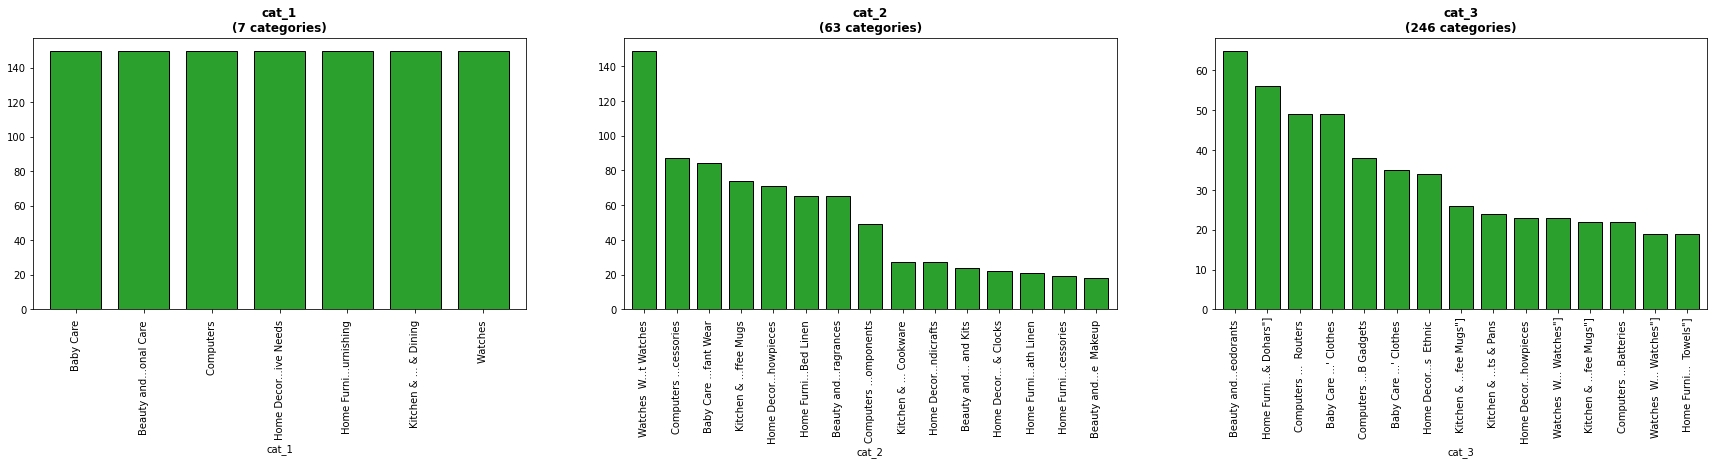

In [17]:
shorten_label = 10
n_first = 15
fig = plt.figure(figsize=(30,5))
for i, col in enumerate(df_cat_level.columns,1):
    # plot the graphs
    ax = fig.add_subplot(1,len(df_cat_level.columns), i)
    ser = df_cat_level.groupby(col).size().sort_values(ascending=False)
    ser[0:n_first].plot.bar(width=0.75, color='tab:green', ec='k', ax=ax)
    # shorten the labels
    thr = int(shorten_label)
    lab_x = [item.get_text() for item in ax.get_xticklabels()]
    short_lab_x = [s[:thr]+'...'+s[-thr:] if len(s)>thr else s for s in lab_x]
    ax.axes.set_xticklabels(short_lab_x)
    # set title
    ax.set_title(col+f'\n({ser.shape[0]} categories)', fontweight='bold')

In [18]:
dict_cat = {'Baby Care ': 'baby','Beauty and Personal Care ': 'beauty', 'Computers ': 'computers',
            'Home Decor & Festive Needs ': 'decor', 'Home Furnishing ': 'home','Kitchen & Dining ': 'kitchen',
            'Watches ': 'watches'}

dict_code = dict(zip(dict_cat.keys(), range(0,7)))

In [19]:

df_cat_level['product_category_code'] = df_cat_level['cat_1'].map(dict_code)
df_cat_level['product_category'] = df_cat_level['cat_1'].map(dict_cat)


<ipython-input-19-926174a49a1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_level['product_category_code'] = df_cat_level['cat_1'].map(dict_code)
<ipython-input-19-926174a49a1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_level['product_category'] = df_cat_level['cat_1'].map(dict_cat)


In [20]:
categories = list(dict_cat.values())

In [21]:
categories

['baby', 'beauty', 'computers', 'decor', 'home', 'kitchen', 'watches']

In [22]:
df_cat_level.reset_index()

uniq_id             cat_1  \
0     55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing    
1     7b72c92c2f6c40268628ec5f14c6d590        Baby Care    
2     64d5d4a258243731dc7bbb1eef49ad74        Baby Care    
3     d4684dcdc759dd9cdf41504698d737d8  Home Furnishing    
4     6325b6870c54cd47be6ebfbffa620ec7  Home Furnishing    
...                                ...               ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc        Baby Care    
1046  fd6cbcc22efb6b761bd564c28928483c        Baby Care    
1047  5912e037d12774bb73a2048f35a00009        Baby Care    
1048  c3edc504d1b4f0ba6224fa53a43a7ad6        Baby Care    
1049  f2f027ad6a6df617c9f125173da71e44        Baby Care    

                                         cat_2  \
0     Home Furnishing  Curtains & Accessories    
1                 Baby Care  Baby Bath & Skin    
2                 Baby Care  Baby Bath & Skin    
3                  Home Furnishing  Bed Linen    
4                  Home Furnishing  Bed Linen    
...                                        ...   
1045             Baby Care  Baby & Kids Gifts    
1046             Baby Care  Baby & Kids Gifts    
1047             Baby Care  Baby & Kids Gifts    
1048             Baby Care  Baby & Kids Gifts    
1049             Baby Care  Baby & Kids Gifts    

                                                  cat_3  \
0     Home Furnishing  Curtains & Accessories  Curta...   
1        Baby Care  Baby Bath & Skin  Baby Bath Towels    
2        Baby Care  Baby Bath & Skin  Baby Bath Towels    
3                Home Furnishing  Bed Linen  Bedsheets    
4                Home Furnishing  Bed Linen  Bedsheets    
...                                                 ...   
1045            Baby Care  Baby & Kids Gifts  Stickers    
1046            Baby Care  Baby & Kids Gifts  Stickers    
1047            Baby Care  Baby & Kids Gifts  Stickers    
1048            Baby Care  Baby & Kids Gifts  Stickers    
1049            Baby Care  Baby & Kids Gifts  Stickers    

      product_category_code product_category  
0                         4             home  
1                         0             baby  
2                         0             baby  
3                         4             home  
4                         4             home  
...                     ...              ...  
1045                      0             baby  
1046                      0             baby  
1047                      0             baby  
1048                      0             baby  
1049                      0             baby  

[1050 rows x 6 columns]

In [23]:

# merging the two data frame

data = pd.concat([df_cat_level,
                         data[["product_name", "description"]]], axis=1).reset_index()

In [24]:
data 

uniq_id             cat_1  \
0     55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing    
1     7b72c92c2f6c40268628ec5f14c6d590        Baby Care    
2     64d5d4a258243731dc7bbb1eef49ad74        Baby Care    
3     d4684dcdc759dd9cdf41504698d737d8  Home Furnishing    
4     6325b6870c54cd47be6ebfbffa620ec7  Home Furnishing    
...                                ...               ...   
1045  958f54f4c46b53c8a0a9b8167d9140bc        Baby Care    
1046  fd6cbcc22efb6b761bd564c28928483c        Baby Care    
1047  5912e037d12774bb73a2048f35a00009        Baby Care    
1048  c3edc504d1b4f0ba6224fa53a43a7ad6        Baby Care    
1049  f2f027ad6a6df617c9f125173da71e44        Baby Care    

                                         cat_2  \
0     Home Furnishing  Curtains & Accessories    
1                 Baby Care  Baby Bath & Skin    
2                 Baby Care  Baby Bath & Skin    
3                  Home Furnishing  Bed Linen    
4                  Home Furnishing  Bed Linen    
...                                        ...   
1045             Baby Care  Baby & Kids Gifts    
1046             Baby Care  Baby & Kids Gifts    
1047             Baby Care  Baby & Kids Gifts    
1048             Baby Care  Baby & Kids Gifts    
1049             Baby Care  Baby & Kids Gifts    

                                                  cat_3  \
0     Home Furnishing  Curtains & Accessories  Curta...   
1        Baby Care  Baby Bath & Skin  Baby Bath Towels    
2        Baby Care  Baby Bath & Skin  Baby Bath Towels    
3                Home Furnishing  Bed Linen  Bedsheets    
4                Home Furnishing  Bed Linen  Bedsheets    
...                                                 ...   
1045            Baby Care  Baby & Kids Gifts  Stickers    
1046            Baby Care  Baby & Kids Gifts  Stickers    
1047            Baby Care  Baby & Kids Gifts  Stickers    
1048            Baby Care  Baby & Kids Gifts  Stickers    
1049            Baby Care  Baby & Kids Gifts  Stickers    

      product_category_code product_category  \
0                         4             home   
1                         0             baby   
2                         0             baby   
3                         4             home   
4                         4             home   
...                     ...              ...   
1045                      0             baby   
1046                      0             baby   
1047                      0             baby   
1048                      0             baby   
1049                      0             baby   

                                           product_name  \
0     Elegance Polyester Multicolor Abstract Eyelet ...   
1                            Sathiyas Cotton Bath Towel   
2                   Eurospa Cotton Terry Face Towel Set   
3     SANTOSH ROYAL FASHION Cotton Printed King size...   
4     Jaipur Print Cotton Floral King sized Double B...   
...                                                 ...   
1045     Oren Empower Extra Large Self Adhesive Sticker   
1046             Wallmantra Large Vinyl Sticker Sticker   
1047  Uberlyfe Extra Large Pigmented Polyvinyl Films...   
1048            Wallmantra Medium Vinyl Sticker Sticker   
1049                       Uberlyfe Large Vinyl Sticker   

                                            description  
0     Key Features of Elegance Polyester Multicolor ...  
1     Specifications of Sathiyas Cotton Bath Towel (...  
2     Key Features of Eurospa Cotton Terry Face Towe...  
3     Key Features of SANTOSH ROYAL FASHION Cotton P...  
4     Key Features of Jaipur Print Cotton Floral Kin...  
...                                                 ...  
1045  Oren Empower Extra Large Self Adhesive Sticker...  
1046  Wallmantra Large Vinyl Sticker Sticker (Pack o...  
1047  Buy Uberlyfe Extra Large Pigmented Polyvinyl F...  
1048  Buy Wallmantra Medium Vinyl Sticker Sticker fo...  
1049  Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...  

[1050 rows x 8 co

In [25]:

data.to_csv('data_saved_data_categories.csv')

## Préparation des données

In [26]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Demonstration de nettoyage de text

In [27]:
data['description'].iloc[0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [30]:

def affiche_liste(liste):
    return liste

description_example = data['description'].iloc[4]

print('======== PRE TRAITEMENT ========')
print(affiche_liste(description_example),'\n')


# punctuationfree
description_example="".join([i for i in description_example if i not in string.punctuation])
print('======== punctuationfree ========')
print(affiche_liste(description_example),'\n')

  
#lowercase
description_example = description_example.lower()
print('======== LOWERCASE ========')
print(affiche_liste(description_example),'\n')

#tokenizer
description_example = word_tokenize(description_example)
print('======== TOKENIZER ========')
print(affiche_liste(description_example),'\n')


#stopwords
description_example = [word for word in description_example if word not in nltk.corpus.stopwords.words('english')] 
print('======== STOPWORDS ========')
print(affiche_liste(description_example),'\n')

#lemmatizer
lemm = WordNetLemmatizer()
description_example = [lemm.lemmatize(el) for el in description_example]
print('======== LEMMATISATION ========')
print(affiche_liste(description_example),'\n')




======== PRE TRAITEMENT ========
Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, White) Price: Rs. 998 This nice bed sheet made up of 100% cotton to give you comfort. This bed sheet is hand printed. This bedsheet gives nice look to your room And its fast colour and good quality gives this bedsheet long life.,Specifications of Jaipur Print Cotton Floral King sized Double Bedsheet (1 bed sheet 2 pillow cover, White) General Machine Washable Yes Brand Jaipur Print Type Flat Model Name jaipur117 Material Cotton Thread Count 140 Model ID jaipur117 Fabric Care machinewash, do not bleach Size King Color White Warranty waranty of the product only for manufacturing defect only and product will exchange onle when it is not used and returne its origional packing Dimensions Flat Sheet Width 86 inch / 220 cm Fitted Sheet Width 0 cm Pillow Cover Width 17 inch / 45 cm Pillow Cover Leng

## Application de tréatment de texte étape par étape

In [29]:
#librarie pour la punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
# définir pour l'élimination de punctuation

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

# stockage du texte libre de ponctuation

data['punctuation_free']= data['description'].apply(lambda x:remove_punctuation(x))
data.head()

uniq_id             cat_1  \
0  55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing    
1  7b72c92c2f6c40268628ec5f14c6d590        Baby Care    
2  64d5d4a258243731dc7bbb1eef49ad74        Baby Care    
3  d4684dcdc759dd9cdf41504698d737d8  Home Furnishing    
4  6325b6870c54cd47be6ebfbffa620ec7  Home Furnishing    

                                      cat_2  \
0  Home Furnishing  Curtains & Accessories    
1              Baby Care  Baby Bath & Skin    
2              Baby Care  Baby Bath & Skin    
3               Home Furnishing  Bed Linen    
4               Home Furnishing  Bed Linen    

                                               cat_3  product_category_code  \
0  Home Furnishing  Curtains & Accessories  Curta...                      4   
1     Baby Care  Baby Bath & Skin  Baby Bath Towels                       0   
2     Baby Care  Baby Bath & Skin  Baby Bath Towels                       0   
3             Home Furnishing  Bed Linen  Bedsheets                       4   
4             Home Furnishing  Bed Linen  Bedsheets                       4   

  product_category                                       product_name  \
0             home  Elegance Polyester Multicolor Abstract Eyelet ...   
1             baby                         Sathiyas Cotton Bath Towel   
2             baby                Eurospa Cotton Terry Face Towel Set   
3             home  SANTOSH ROYAL FASHION Cotton Printed King size...   
4             home  Jaipur Print Cotton Floral King sized Double B...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                    punctuation_free  
0  Key Features of Elegance Polyester Multicolor ...  
1  Specifications of Sathiyas Cotton Bath Towel 3...  
2  Key Features of Eurospa Cotton Terry Face Towe...  
3  Key Features of SANTOSH ROYAL FASHION Cotton P...  
4  Key Features of Jaipur Print Cotton Floral Kin...

In [32]:
   # Changer les alphabets en minuscules
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower()
   
    # éviter les numéros
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    return df
data= clean_text(data, 'punctuation_free','clean_des')
data.head(2)

uniq_id             cat_1  \
0  55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing    
1  7b72c92c2f6c40268628ec5f14c6d590        Baby Care    

                                      cat_2  \
0  Home Furnishing  Curtains & Accessories    
1              Baby Care  Baby Bath & Skin    

                                               cat_3  product_category_code  \
0  Home Furnishing  Curtains & Accessories  Curta...                      4   
1     Baby Care  Baby Bath & Skin  Baby Bath Towels                       0   

  product_category                                       product_name  \
0             home  Elegance Polyester Multicolor Abstract Eyelet ...   
1             baby                         Sathiyas Cotton Bath Towel   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   

                                    punctuation_free  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel 3...   

                                           clean_des  
0  key features of elegance polyester multicolor ...  
1  specifications of sathiyas cotton bath towel  ...

In [33]:
# No_stopwords

stop = stopwords.words('english')
data['no_stopwords'] = data['clean_des'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head(2)

uniq_id             cat_1  \
0  55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing    
1  7b72c92c2f6c40268628ec5f14c6d590        Baby Care    

                                      cat_2  \
0  Home Furnishing  Curtains & Accessories    
1              Baby Care  Baby Bath & Skin    

                                               cat_3  product_category_code  \
0  Home Furnishing  Curtains & Accessories  Curta...                      4   
1     Baby Care  Baby Bath & Skin  Baby Bath Towels                       0   

  product_category                                       product_name  \
0             home  Elegance Polyester Multicolor Abstract Eyelet ...   
1             baby                         Sathiyas Cotton Bath Towel   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   

                                    punctuation_free  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel 3...   

                                           clean_des  \
0  key features of elegance polyester multicolor ...   
1  specifications of sathiyas cotton bath towel  ...   

                                        no_stopwords  
0  key features elegance polyester multicolor abs...  
1  specifications sathiyas cotton bath towel bath...

In [34]:
# tokonize

data['tokens'] = data['no_stopwords'].apply(lambda x : word_tokenize(x))
data.head(2)

uniq_id             cat_1  \
0  55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing    
1  7b72c92c2f6c40268628ec5f14c6d590        Baby Care    

                                      cat_2  \
0  Home Furnishing  Curtains & Accessories    
1              Baby Care  Baby Bath & Skin    

                                               cat_3  product_category_code  \
0  Home Furnishing  Curtains & Accessories  Curta...                      4   
1     Baby Care  Baby Bath & Skin  Baby Bath Towels                       0   

  product_category                                       product_name  \
0             home  Elegance Polyester Multicolor Abstract Eyelet ...   
1             baby                         Sathiyas Cotton Bath Towel   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   

                                    punctuation_free  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel 3...   

                                           clean_des  \
0  key features of elegance polyester multicolor ...   
1  specifications of sathiyas cotton bath towel  ...   

                                        no_stopwords  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   

                                              tokens  
0  [key, features, elegance, polyester, multicolo...  
1  [specifications, sathiyas, cotton, bath, towel...

In [35]:
# Éviter les mots de moins de trois lettres

def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [36]:
data['larger_tokens'] = data['tokens'].apply(lambda x : remove_small_words(x))
data.head()

uniq_id             cat_1  \
0  55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing    
1  7b72c92c2f6c40268628ec5f14c6d590        Baby Care    
2  64d5d4a258243731dc7bbb1eef49ad74        Baby Care    
3  d4684dcdc759dd9cdf41504698d737d8  Home Furnishing    
4  6325b6870c54cd47be6ebfbffa620ec7  Home Furnishing    

                                      cat_2  \
0  Home Furnishing  Curtains & Accessories    
1              Baby Care  Baby Bath & Skin    
2              Baby Care  Baby Bath & Skin    
3               Home Furnishing  Bed Linen    
4               Home Furnishing  Bed Linen    

                                               cat_3  product_category_code  \
0  Home Furnishing  Curtains & Accessories  Curta...                      4   
1     Baby Care  Baby Bath & Skin  Baby Bath Towels                       0   
2     Baby Care  Baby Bath & Skin  Baby Bath Towels                       0   
3             Home Furnishing  Bed Linen  Bedsheets                       4   
4             Home Furnishing  Bed Linen  Bedsheets                       4   

  product_category                                       product_name  \
0             home  Elegance Polyester Multicolor Abstract Eyelet ...   
1             baby                         Sathiyas Cotton Bath Towel   
2             baby                Eurospa Cotton Terry Face Towel Set   
3             home  SANTOSH ROYAL FASHION Cotton Printed King size...   
4             home  Jaipur Print Cotton Floral King sized Double B...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                    punctuation_free  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel 3...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                           clean_des  \
0  key features of elegance polyester multicolor ...   
1  specifications of sathiyas cotton bath towel  ...   
2  key features of eurospa cotton terry face towe...   
3  key features of santosh royal fashion cotton p...   
4  key features of jaipur print cotton floral kin...   

                                        no_stopwords  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                              tokens  \
0  [key, features, elegance, polyester, multicolo...   
1  [specifications, sathiyas, cotton, bath, towel...   
2  [key, features, eurospa, cotton, terry, face, ...   
3  [key, features, santosh, royal, fashion, cotto...   
4  [key, features, jaipur, print, cotton, floral,...   

                                       larger_tokens  
0  [features, elegance, polyester, multicolor, ab...  
1  [specifications, sathiyas, cotton, bath, towel...  
2  [features, eurospa, cotton, terry, face, towel...  
3  [features, santosh, royal, fashion, cotton, pr...  
4  [features, jaipur, print, cotton, floral, king...

In [37]:

# stemming 

def stemming(text):
    ps = PorterStemmer()
    return [ps.stem(word) for word in text]

In [38]:
data['stem_words'] = data['larger_tokens'].apply(lambda wrd: stemming(wrd))
data.head()

uniq_id             cat_1  \
0  55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing    
1  7b72c92c2f6c40268628ec5f14c6d590        Baby Care    
2  64d5d4a258243731dc7bbb1eef49ad74        Baby Care    
3  d4684dcdc759dd9cdf41504698d737d8  Home Furnishing    
4  6325b6870c54cd47be6ebfbffa620ec7  Home Furnishing    

                                      cat_2  \
0  Home Furnishing  Curtains & Accessories    
1              Baby Care  Baby Bath & Skin    
2              Baby Care  Baby Bath & Skin    
3               Home Furnishing  Bed Linen    
4               Home Furnishing  Bed Linen    

                                               cat_3  product_category_code  \
0  Home Furnishing  Curtains & Accessories  Curta...                      4   
1     Baby Care  Baby Bath & Skin  Baby Bath Towels                       0   
2     Baby Care  Baby Bath & Skin  Baby Bath Towels                       0   
3             Home Furnishing  Bed Linen  Bedsheets                       4   
4             Home Furnishing  Bed Linen  Bedsheets                       4   

  product_category                                       product_name  \
0             home  Elegance Polyester Multicolor Abstract Eyelet ...   
1             baby                         Sathiyas Cotton Bath Towel   
2             baby                Eurospa Cotton Terry Face Towel Set   
3             home  SANTOSH ROYAL FASHION Cotton Printed King size...   
4             home  Jaipur Print Cotton Floral King sized Double B...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                    punctuation_free  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel 3...   
2  Key Features of Eurospa Cotton Terry Face Towe...   
3  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4  Key Features of Jaipur Print Cotton Floral Kin...   

                                           clean_des  \
0  key features of elegance polyester multicolor ...   
1  specifications of sathiyas cotton bath towel  ...   
2  key features of eurospa cotton terry face towe...   
3  key features of santosh royal fashion cotton p...   
4  key features of jaipur print cotton floral kin...   

                                        no_stopwords  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                              tokens  \
0  [key, features, elegance, polyester, multicolo...   
1  [specifications, sathiyas, cotton, bath, towel...   
2  [key, features, eurospa, cotton, terry, face, ...   
3  [key, features, santosh, royal, fashion, cotto...   
4  [key, features, jaipur, print, cotton, floral,...   

                                       larger_tokens  \
0  [features, elegance, polyester, multicolor, ab...   
1  [specifications, sathiyas, cotton, bath, towel...   
2  [features, eurospa, cotton, terry, face, towel...   
3  [features, santosh, royal, fashion, cotton, pr...   
4  [features, jaipur, print, cotton, floral, king...   

                                          stem_words  
0  [featur, eleg, polyest, multicolor, abstract, ...  
1  [specif, sathiya, cotton, bath, towel, bath, t...  
2  [featur, eurospa, cotton, terri, face, towel, ...  
3  [featur, santosh, royal, fashion, cotton, prin...  
4  [featur, jaipur, print, cotton, floral, king, ...

In [39]:
# lemmatization 
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]
    

In [40]:
data['lemma_words'] = data['larger_tokens'].apply(lambda x : lemmatize(x))
data.head(1)

uniq_id             cat_1  \
0  55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing    

                                      cat_2  \
0  Home Furnishing  Curtains & Accessories    

                                               cat_3  product_category_code  \
0  Home Furnishing  Curtains & Accessories  Curta...                      4   

  product_category                                       product_name  \
0             home  Elegance Polyester Multicolor Abstract Eyelet ...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   

                                    punctuation_free  \
0  Key Features of Elegance Polyester Multicolor ...   

                                           clean_des  \
0  key features of elegance polyester multicolor ...   

                                        no_stopwords  \
0  key features elegance polyester multicolor abs...   

                                              tokens  \
0  [key, features, elegance, polyester, multicolo...   

                                       larger_tokens  \
0  [features, elegance, polyester, multicolor, ab...   

                                          stem_words  \
0  [featur, eleg, polyest, multicolor, abstract, ...   

                                         lemma_words  
0  [feature, elegance, polyester, multicolor, abs...

In [41]:
# créer un nouveau colonne basé sur lemmatization

def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [42]:
data['clean_text'] = data['lemma_words'].apply(lambda x : return_sentences(x))
data.head(1)

uniq_id             cat_1  \
0  55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing    

                                      cat_2  \
0  Home Furnishing  Curtains & Accessories    

                                               cat_3  product_category_code  \
0  Home Furnishing  Curtains & Accessories  Curta...                      4   

  product_category                                       product_name  \
0             home  Elegance Polyester Multicolor Abstract Eyelet ...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   

                                    punctuation_free  \
0  Key Features of Elegance Polyester Multicolor ...   

                                           clean_des  \
0  key features of elegance polyester multicolor ...   

                                        no_stopwords  \
0  key features elegance polyester multicolor abs...   

                                              tokens  \
0  [key, features, elegance, polyester, multicolo...   

                                       larger_tokens  \
0  [features, elegance, polyester, multicolor, ab...   

                                          stem_words  \
0  [featur, eleg, polyest, multicolor, abstract, ...   

                                         lemma_words  \
0  [feature, elegance, polyester, multicolor, abs...   

                                          clean_text  
0  feature elegance polyester multicolor abstract...

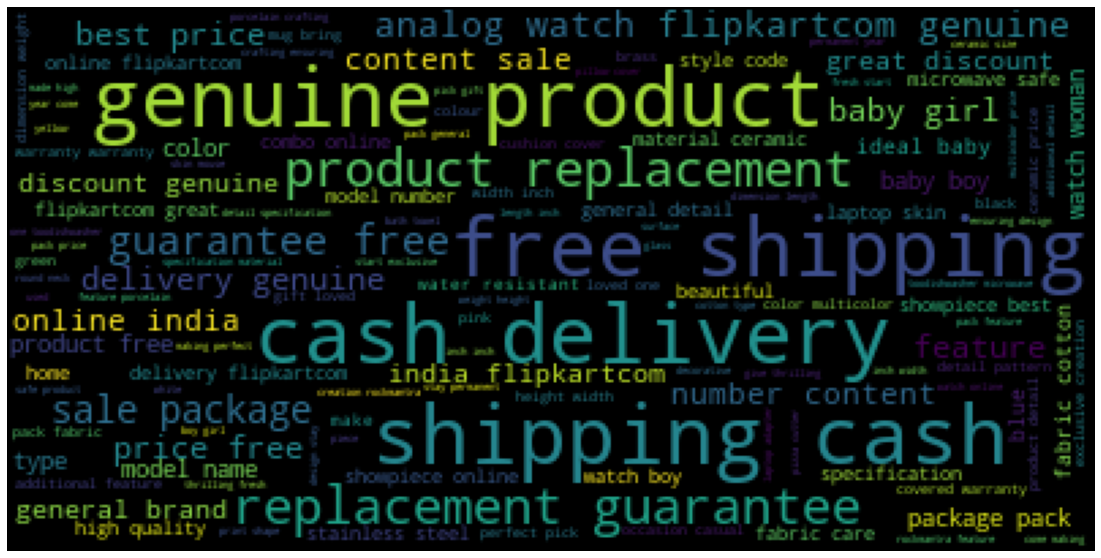

In [43]:

# Generer  word cloud de base
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join([x for x in data['clean_text']])
# Créer et générer une image de Word Cloud:
wordcloud = WordCloud(max_font_size=30, max_words=1000).generate(text)

# Afficher l'image générée:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [44]:
words_to_delete = {'product', 'free', 'buy', 'delivery', 'genuine', 'shipping', 'cash', 'replacement', 'price', 'day', 'guarantee', 'feature', 'type'}

In [45]:
words_to_delete

{'buy',
 'cash',
 'day',
 'delivery',
 'feature',
 'free',
 'genuine',
 'guarantee',
 'price',
 'product',
 'replacement',
 'shipping',
 'type'}

In [46]:
# éviter les mots "words_to_delete"

def return_sentences(clean_words):
    return " ".join([i for i in clean_words if i not in words_to_delete])



In [47]:
data['final_text'] = data['lemma_words'].apply(lambda x : return_sentences(x))
data.head(1)

uniq_id             cat_1  \
0  55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing    

                                      cat_2  \
0  Home Furnishing  Curtains & Accessories    

                                               cat_3  product_category_code  \
0  Home Furnishing  Curtains & Accessories  Curta...                      4   

  product_category                                       product_name  \
0             home  Elegance Polyester Multicolor Abstract Eyelet ...   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   

                                    punctuation_free  \
0  Key Features of Elegance Polyester Multicolor ...   

                                           clean_des  \
0  key features of elegance polyester multicolor ...   

                                        no_stopwords  \
0  key features elegance polyester multicolor abs...   

                                              tokens  \
0  [key, features, elegance, polyester, multicolo...   

                                       larger_tokens  \
0  [features, elegance, polyester, multicolor, ab...   

                                          stem_words  \
0  [featur, eleg, polyest, multicolor, abstract, ...   

                                         lemma_words  \
0  [feature, elegance, polyester, multicolor, abs...   

                                          clean_text  \
0  feature elegance polyester multicolor abstract...   

                                          final_text  
0  elegance polyester multicolor abstract eyelet ...

In [48]:
data['final_text'].iloc[0]

'elegance polyester multicolor abstract eyelet door curtain floral curtainelegance polyester multicolor abstract eyelet door curtain height pack curtain enhances look interiorsthis curtain made high quality polyester fabricit eyelet style stitch metal ringit make room environment romantic lovingthis curtain wrinkle anti shrinkage elegant apparancegive home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room right amount sunlightspecifications elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door eyelet model name abstract polyester door curtain model duster color multicolor dimension length number content sale package pack sale package curtain body design ma

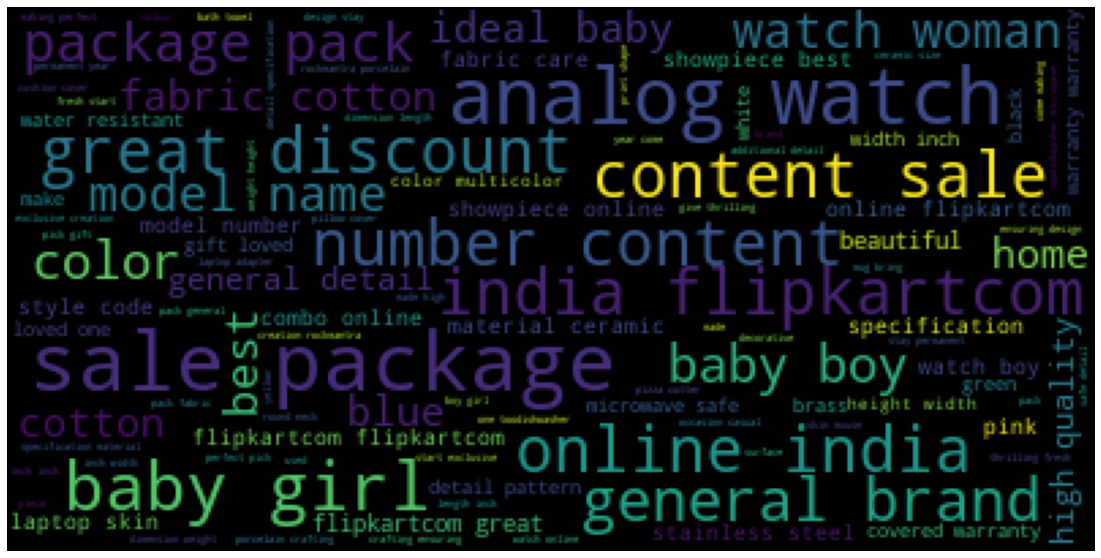

In [49]:

# Generer la Nuage de mot

from wordcloud import WordCloud, ImageColorGenerator

text = " ".join([x for x in data['final_text']])

# Créer et générer une image de Nuage de mot

wordcloud = WordCloud(max_font_size=30, max_words=1000).generate(text)

# Afficher l'image générée:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

##  Nuage de mots avant le nettoyage des données

In [50]:
df_by_cat = data.groupby(['cat_1'])['description'].apply(' '.join).reset_index()

In [51]:
wc = WordCloud(width = 800 ,height = 400 , background_color="white" )

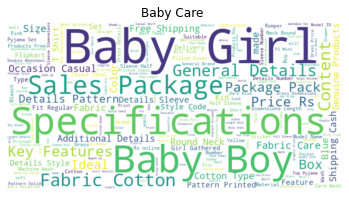

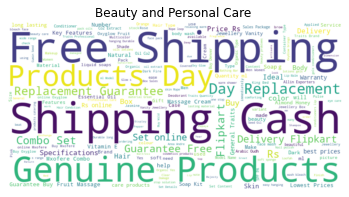

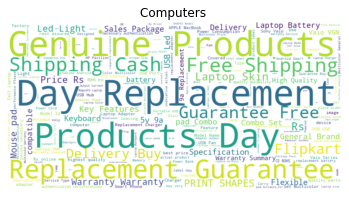

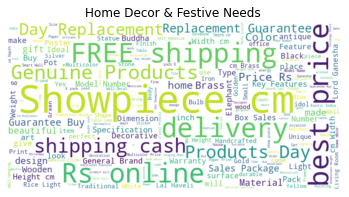

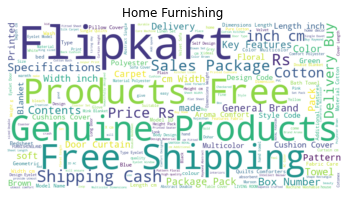

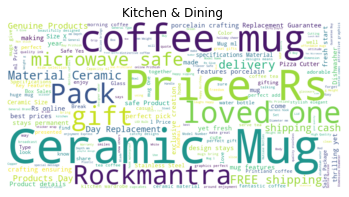

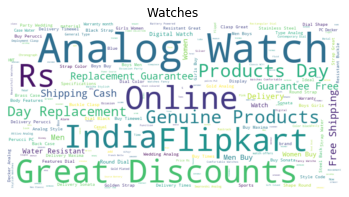

In [52]:
for i in range(0,7):
  text = df_by_cat.iloc[i]['description']
  wc.generate(text)
  wc.to_file(r'C:\Users\Tewod\OneDrive\Bureau\Openclassrooms\projets\projet6\docs.png')
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title(df_by_cat.iloc[i]['cat_1'])
  plt.show()

* Certaines catégories ont des mots-clés plus « saillants » et plus représentatifs que d’autres

* Mots-clés communs à certaines catégories

* Pollution des données par des mots génériques


## Nuage de mots apres le nettoyage des données

In [53]:
df_by_cat = data.groupby(['cat_1'])['final_text'].apply(' '.join).reset_index()

In [54]:
wc = WordCloud(width = 800 ,height = 400 , background_color="white" )

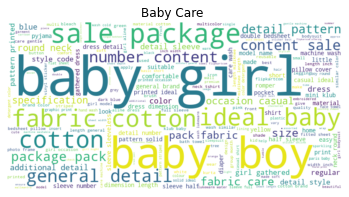

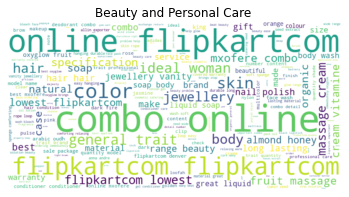

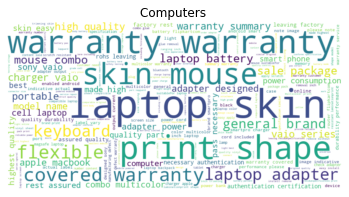

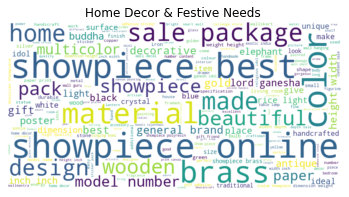

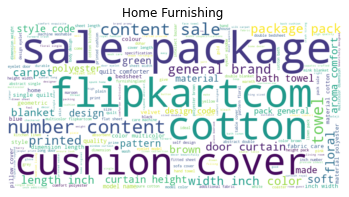

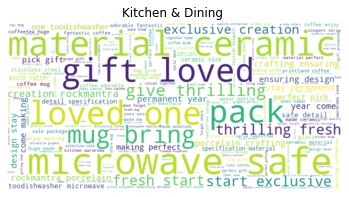

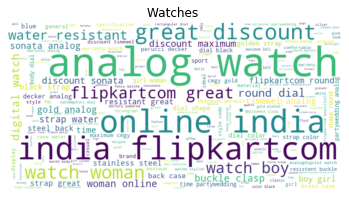

In [55]:
for i in range(0,7):
  text = df_by_cat.iloc[i]['final_text']
  wc.generate(text)
  wc.to_file(r'C:\Users\Tewod\OneDrive\Bureau\Openclassrooms\projets\projet6\docs.png')
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title(df_by_cat.iloc[i]['cat_1'])
  plt.show()

## Bag of Words avec countvectorizer

In [56]:
cv = CountVectorizer(analyzer=lambda x: x, stop_words='english',min_df=0.001, max_df = 0.8 ) # Analyzer doit être désactivé afin d'accepter une liste
                                                                        

X = cv.fit_transform(data['lemma_words'])

In [57]:
feature_names = cv.get_feature_names()
df_count_vect = pd.DataFrame(X.toarray(), columns = feature_names)
df_count_vect.head()

aapno  ability  able  abode  absorbency  absorbent  abstract  accent  \
0      0        0     0      0           0          0         4       0   
1      0        0     0      0           0          0         0       0   
2      0        0     0      0           1          0         0       0   
3      0        0     0      0           0          0         0       0   
4      0        0     0      0           0          0         0       0   

   access  accessory  ...  york  young  youre  youth  youthful  yuva  zero  \
0       0          0  ...     0      0      0      0         0     0     0   
1       0          0  ...     0      0      0      0         0     0     0   
2       0          0  ...     0      0      0      0         0     0     0   
3       0          0  ...     0      0      0      0         0     0     0   
4       0          0  ...     0      0      0      0         0     0     0   

   zipper  zone  zyxel  
0       0     0      0  
1       0     0      0  
2       0     0      0  
3       0     0      0  
4       0     0      0  

[5 rows x 1967 columns]

In [58]:
# Sauvegarde

np.savetxt("df_count_vect.csv", df_count_vect)

In [59]:
# Ajout de la colonne tf_idf dans le dataset

bag_vect = X.toarray().astype("float32")

data["Count_vect"] = ""

for i in range(data.shape[0]):
    data["Count_vect"][i] = bag_vect[i]

data.head(2)

<ipython-input-59-87fa53f6403e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Count_vect"][i] = bag_vect[i]


uniq_id             cat_1  \
0  55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing    
1  7b72c92c2f6c40268628ec5f14c6d590        Baby Care    

                                      cat_2  \
0  Home Furnishing  Curtains & Accessories    
1              Baby Care  Baby Bath & Skin    

                                               cat_3  product_category_code  \
0  Home Furnishing  Curtains & Accessories  Curta...                      4   
1     Baby Care  Baby Bath & Skin  Baby Bath Towels                       0   

  product_category                                       product_name  \
0             home  Elegance Polyester Multicolor Abstract Eyelet ...   
1             baby                         Sathiyas Cotton Bath Towel   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   

                                    punctuation_free  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel 3...   

                                           clean_des  \
0  key features of elegance polyester multicolor ...   
1  specifications of sathiyas cotton bath towel  ...   

                                        no_stopwords  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   

                                              tokens  \
0  [key, features, elegance, polyester, multicolo...   
1  [specifications, sathiyas, cotton, bath, towel...   

                                       larger_tokens  \
0  [features, elegance, polyester, multicolor, ab...   
1  [specifications, sathiyas, cotton, bath, towel...   

                                          stem_words  \
0  [featur, eleg, polyest, multicolor, abstract, ...   
1  [specif, sathiya, cotton, bath, towel, bath, t...   

                                         lemma_words  \
0  [feature, elegance, polyester, multicolor, abs...   
1  [specification, sathiyas, cotton, bath, towel,...   

                                          clean_text  \
0  feature elegance polyester multicolor abstract...   
1  specification sathiyas cotton bath towel bath ...   

                                          final_text  \
0  elegance polyester multicolor abstract eyelet ...   
1  specification sathiyas cotton bath towel bath ...   

                                          Count_vect  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

## Extraction des features avec tf_idf

In [60]:
# Instanciation of the tf-idf vectorizer

tfidf = TfidfVectorizer(encoding = 'utf-8',
                        analyzer=lambda x: x, # on doit annuler la fonction analyser pour pouvoir fitter une liste (corpus)
    strip_accents='unicode',
    lowercase=True,
    stop_words='english',
    max_df=0.8,
    min_df=0.01,
    ngram_range=(1, 1)
)

# Application of the tf-idf vectorizer
corpus = data['lemma_words']
X_tfidf = tfidf.fit_transform(corpus)

# Conversion to a dense array for later use
X_tfidfdense = X_tfidf.todense()

print('Size of the vocabulary: {}'.format(len(list(tfidf.vocabulary_))))
print('Number of stop words: {}'.format(len(tfidf.stop_words_)))

Size of the vocabulary: 441
Number of stop words: 4326


In [61]:
feature_names = tfidf.get_feature_names()
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns = feature_names)
df_tfidf.head()

abstract  accessory  actual  adapter  additional  adorable  affordable  \
0  0.212022        0.0     0.0      0.0         0.0       0.0         0.0   
1  0.000000        0.0     0.0      0.0         0.0       0.0         0.0   
2  0.000000        0.0     0.0      0.0         0.0       0.0         0.0   
3  0.000000        0.0     0.0      0.0         0.0       0.0         0.0   
4  0.000000        0.0     0.0      0.0         0.0       0.0         0.0   

   also  aluminium  analog  ...  wireless  without     woman  wood  wooden  \
0   0.0        0.0     0.0  ...       0.0      0.0  0.000000   0.0     0.0   
1   0.0        0.0     0.0  ...       0.0      0.0  0.077617   0.0     0.0   
2   0.0        0.0     0.0  ...       0.0      0.0  0.045435   0.0     0.0   
3   0.0        0.0     0.0  ...       0.0      0.0  0.000000   0.0     0.0   
4   0.0        0.0     0.0  ...       0.0      0.0  0.000000   0.0     0.0   

   work  would      year    yellow  youre  
0   0.0    0.0  0.000000  0.000000    0.0  
1   0.0    0.0  0.000000  0.205735    0.0  
2   0.0    0.0  0.053623  0.000000    0.0  
3   0.0    0.0  0.000000  0.000000    0.0  
4   0.0    0.0  0.000000  0.000000    0.0  

[5 rows x 441 columns]

In [62]:
# sauvegarder les données

np.savetxt("df_tfidf.csv", df_tfidf)

In [63]:
# Ajout de la colonne tf_idf dans le dataset
tfidf_vect = X_tfidf.toarray().astype("float32")

data["tf_idf"] = ""

for i in range(data.shape[0]):
    data["tf_idf"][i] = tfidf_vect[i]

data.head(2)

<ipython-input-63-d939127cd244>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tf_idf"][i] = tfidf_vect[i]


uniq_id             cat_1  \
0  55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing    
1  7b72c92c2f6c40268628ec5f14c6d590        Baby Care    

                                      cat_2  \
0  Home Furnishing  Curtains & Accessories    
1              Baby Care  Baby Bath & Skin    

                                               cat_3  product_category_code  \
0  Home Furnishing  Curtains & Accessories  Curta...                      4   
1     Baby Care  Baby Bath & Skin  Baby Bath Towels                       0   

  product_category                                       product_name  \
0             home  Elegance Polyester Multicolor Abstract Eyelet ...   
1             baby                         Sathiyas Cotton Bath Towel   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   

                                    punctuation_free  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel 3...   

                                           clean_des  \
0  key features of elegance polyester multicolor ...   
1  specifications of sathiyas cotton bath towel  ...   

                                        no_stopwords  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   

                                              tokens  \
0  [key, features, elegance, polyester, multicolo...   
1  [specifications, sathiyas, cotton, bath, towel...   

                                       larger_tokens  \
0  [features, elegance, polyester, multicolor, ab...   
1  [specifications, sathiyas, cotton, bath, towel...   

                                          stem_words  \
0  [featur, eleg, polyest, multicolor, abstract, ...   
1  [specif, sathiya, cotton, bath, towel, bath, t...   

                                         lemma_words  \
0  [feature, elegance, polyester, multicolor, abs...   
1  [specification, sathiyas, cotton, bath, towel,...   

                                          clean_text  \
0  feature elegance polyester multicolor abstract...   
1  specification sathiyas cotton bath towel bath ...   

                                          final_text  \
0  elegance polyester multicolor abstract eyelet ...   
1  specification sathiyas cotton bath towel bath ...   

                                          Count_vect  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                              tf_idf  
0  [0.21202192, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

## Clustering données textuelles

### Solution 1: L'Allocation de Dirichlet latente (LDA)

#### Intuitivement, le modèle LDA essaie de trouver des groupes de mots (les sujets, ou topics) qui apparaissent fréquemment ensemble.
#### À partir du bag-of-words, utiliser un LDA avec un nombre de topics = nombre de catégories

###   Solution 2 : À partir de la matrice post ACP, faire un clustering avec K-means (k = nombre de catégories)
####    Faire un t-SNE, catégories puis clusters en couleur

In [64]:
tf_feature_names = tfidf.get_feature_names()

In [65]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(
n_components=data['cat_1'].nunique(),
max_iter=50,
learning_method='batch',
learning_offset=50.,
random_state=0)

In [66]:
document_topics = lda.fit_transform(X_tfidf)

In [67]:
print("lda_components.shape :", lda.components_.shape)

lda_components.shape : (7, 441)


In [68]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [69]:
tfidf_feature_names = tfidf.get_feature_names()
model = lda
print_top_words(model, tfidf_feature_names, n_top_words = 10)

Topic #0: material cover pack color inch feature model design number dimension
Topic #1: kadhai flipkartcom blanket single abstract genuine cash shipping delivery free
Topic #2: watch analog showpiece india discount great woman guarantee online replacement
Topic #3: flipkartcom genuine shipping cash delivery free guarantee replacement product online
Topic #4: sticker bottle prithish best ceramic soap light price online cream
Topic #5: warranty light power adapter mug quality laptop battery flexible charger
Topic #6: baby cotton detail girl towel fabric ideal skin dress boy



In [70]:
topicnames = ["Topic " + str(i) for i in range(lda.n_components)]

In [71]:
df_lda = pd.DataFrame(np.round(document_topics, 2), columns=topicnames)

In [72]:
dominant_topic = np.argmax(df_lda.values, axis=1)

In [73]:
df_lda['dominant_topic'] = dominant_topic

In [74]:
df_lda.head(10)

Topic 0  Topic 1  Topic 2  Topic 3  Topic 4  Topic 5  Topic 6  \
0     0.84     0.03     0.03     0.03     0.03     0.03     0.03   
1     0.05     0.03     0.03     0.03     0.03     0.03     0.81   
2     0.19     0.03     0.03     0.03     0.03     0.12     0.59   
3     0.84     0.03     0.03     0.03     0.03     0.03     0.03   
4     0.81     0.02     0.02     0.02     0.02     0.06     0.02   
5     0.03     0.03     0.80     0.03     0.03     0.03     0.03   
6     0.03     0.03     0.80     0.03     0.03     0.03     0.03   
7     0.03     0.03     0.14     0.03     0.03     0.70     0.03   
8     0.03     0.03     0.81     0.03     0.03     0.03     0.03   
9     0.12     0.03     0.74     0.03     0.03     0.03     0.03   

   dominant_topic  
0               0  
1               6  
2               6  
3               0  
4               0  
5               2  
6               2  
7               5  
8               2  
9               2

In [75]:
df_lda['dominant_topic'].value_counts()

0    241
3    227
6    188
2    184
5     77
1     74
4     59
Name: dominant_topic, dtype: int64

### Topic le plus représenté par catégorie d'article

In [76]:
data_lda = data.copy()
data_lda['topic_lda'] = df_lda['dominant_topic']
data['topic_lda']= df_lda['dominant_topic']

In [77]:
data.head(2)

uniq_id             cat_1  \
0  55b85ea15a1536d46b7190ad6fff8ce7  Home Furnishing    
1  7b72c92c2f6c40268628ec5f14c6d590        Baby Care    

                                      cat_2  \
0  Home Furnishing  Curtains & Accessories    
1              Baby Care  Baby Bath & Skin    

                                               cat_3  product_category_code  \
0  Home Furnishing  Curtains & Accessories  Curta...                      4   
1     Baby Care  Baby Bath & Skin  Baby Bath Towels                       0   

  product_category                                       product_name  \
0             home  Elegance Polyester Multicolor Abstract Eyelet ...   
1             baby                         Sathiyas Cotton Bath Towel   

                                         description  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel (...   

                                    punctuation_free  \
0  Key Features of Elegance Polyester Multicolor ...   
1  Specifications of Sathiyas Cotton Bath Towel 3...   

                                           clean_des  \
0  key features of elegance polyester multicolor ...   
1  specifications of sathiyas cotton bath towel  ...   

                                        no_stopwords  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   

                                              tokens  \
0  [key, features, elegance, polyester, multicolo...   
1  [specifications, sathiyas, cotton, bath, towel...   

                                       larger_tokens  \
0  [features, elegance, polyester, multicolor, ab...   
1  [specifications, sathiyas, cotton, bath, towel...   

                                          stem_words  \
0  [featur, eleg, polyest, multicolor, abstract, ...   
1  [specif, sathiya, cotton, bath, towel, bath, t...   

                                         lemma_words  \
0  [feature, elegance, polyester, multicolor, abs...   
1  [specification, sathiyas, cotton, bath, towel,...   

                                          clean_text  \
0  feature elegance polyester multicolor abstract...   
1  specification sathiyas cotton bath towel bath ...   

                                          final_text  \
0  elegance polyester multicolor abstract eyelet ...   
1  specification sathiyas cotton bath towel bath ...   

                                          Count_vect  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                              tf_idf  topic_lda  
0  [0.21202192, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...          0  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...          6

In [78]:
data.topic_lda.unique()

array([0, 6, 2, 5, 3, 1, 4], dtype=int64)

###  Score extrinsèque

In [79]:
y_true=data["product_category_code"]
y_predcited=data["topic_lda"]

#score
ari = metrics.adjusted_rand_score(y_true,y_predcited)
print("ARi score : ", ari)

homogeneity=homogeneity_score(y_true,y_predcited)
print("Homogeneity :", homogeneity)

completeness=completeness_score(y_true,y_predcited)
print("Completeness :", completeness)

v_measure=v_measure_score(y_true,y_predcited)  
print("v_measure_score :",v_measure)

Adjusted_mutual_info=adjusted_mutual_info_score(y_true,y_predcited)
print("adjusted_mutual_info_score:", Adjusted_mutual_info) 


ARi score :  0.2523536172733547
Homogeneity : 0.3192441902138591
Completeness : 0.3408795134816327
v_measure_score : 0.32970730677514765
adjusted_mutual_info_score: 0.3234603202280207


### Matrice de confusion

In [80]:
conf_mat = metrics.confusion_matrix(y_true,y_predcited)
print(conf_mat)

[[ 17   8   0  10  10   3 102]
 [ 13   0   0  91  12   8  26]
 [  7  17  14  54   6  41  11]
 [ 81   0  25  32   7   4   1]
 [ 66  48   0  15   0   1  20]
 [ 55   1   6  25  24  18  21]
 [  2   0 139   0   0   2   7]]


In [81]:
df_topic_distribution = df_lda['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

Topic Num  Num Documents
0          0            241
1          3            227
2          6            188
3          2            184
4          5             77
5          1             74
6          4             59

### Solution 2 : À partir de la matrice post ACP, faire un clustering avec K-means (k = nombre de catégories)

## K-means clustering

In [98]:
pca = decomposition.PCA(n_components=0.99, svd_solver='full')
kmeans = KMeans(n_clusters=7, random_state=0, init='k-means++', n_init=10, max_iter=300)

#### dataframe de stokage des resultats

In [99]:
df_result_tot = pd.DataFrame(columns=['Model','ARI','kmeans silouette score','ARI_tsne5','ARI_tsne25','ARI_tsne50'])

#### Fonction de mise en forme de matrice de confusion

In [100]:
def conf_mat_transform(conf_mat) :
    '''function to re-assign clusters by maximizing the diagonal of the confusion matrix'''

    # Inverse the number of items per categories (in order to use following function)
    conf_mat_temp = 1 /(conf_mat + 0.001)
    
    # apply function to get the combination of columns to minimize the diagonal 
    from scipy.optimize import linear_sum_assignment
    row_ind, col_ind = linear_sum_assignment(conf_mat_temp)

    # transform matrix according to new columns combination
    conf_mat_transform = conf_mat[:, col_ind]
    
    # reverse liste of column index
    corresp = col_ind.tolist()
    
    return corresp, conf_mat_transform

In [101]:
def analyse(X,name):

  df_result = pd.DataFrame(columns=['Model','ARI','kmeans silouette score','ARI_tsne5','ARI_tsne25','ARI_tsne50'])

  X_kmean = kmeans.fit_transform(X)
  y_pred = pd.Series(kmeans.labels_)

  y_true = data['product_category_code']

  tsne5 = manifold.TSNE(perplexity=5 , n_iter=1000, init='random', random_state=0)
  X_tsne5 = tsne5.fit_transform(X)
  X_kmean_tsne5 = kmeans.fit_transform(X_tsne5)
  y_pred_tsne5 = pd.Series(kmeans.labels_)
  df_tsne5 = pd.DataFrame(X_tsne5[:,0:2], columns=['tsne1', 'tsne2'])
  df_tsne5["class"] = data["cat_1"]
  df_tsne5["id"] = data["uniq_id"]
  df_tsne5["kmeans"] = y_pred
  df_tsne5["kmeans_tsne5"] = y_pred_tsne5

  tsne25 = manifold.TSNE(perplexity=25 , n_iter=1000, init='random', random_state=0)
  X_tsne25 = tsne25.fit_transform(X)
  X_kmean_tsne25 = kmeans.fit_transform(X_tsne25)
  y_pred_tsne25 = pd.Series(kmeans.labels_)
  df_tsne25 = pd.DataFrame(X_tsne25[:,0:2], columns=['tsne1', 'tsne2'])
  df_tsne25["class"] = data["cat_1"]
  df_tsne25["id"] = data["uniq_id"]
  df_tsne25["kmeans"] = y_pred
  df_tsne25["kmeans_tsne25"] = y_pred_tsne25

  tsne50 = manifold.TSNE(perplexity=50 , n_iter=1000, init='random', random_state=0)
  X_tsne50 = tsne50.fit_transform(X)
  X_kmean_tsne50 = kmeans.fit_transform(X_tsne50)
  y_pred_tsne50 = pd.Series(kmeans.labels_)
  df_tsne50 = pd.DataFrame(X_tsne50[:,0:2], columns=['tsne1', 'tsne2'])
  df_tsne50["class"] = data["cat_1"]
  df_tsne50["id"] = data["uniq_id"]
  df_tsne50["kmeans"] = y_pred
  df_tsne50["kmeans_tsne50"] = y_pred_tsne50

  X_umap = umap.UMAP().fit_transform(X)
  df_umap = pd.DataFrame(X_umap[:,0:2], columns=['umap1', 'umap2'])
  df_umap["class"] = data["cat_1"]
  df_umap["id"] = data["uniq_id"]
  df_umap["kmeans"] = y_pred

  #tsne5
  plt.figure(figsize=(15,8))
  sns.scatterplot(
      x="tsne1", y="tsne2", hue="class", data=df_tsne5, legend="brief",
      palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

  plt.title('TSNE 5 selon les vraies classes', fontsize = 15, pad = 35, fontweight = 'bold')
  plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
  plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
  plt.legend(prop={'size': 10}) 

  plt.show()

  plt.figure(figsize=(15,8))
  sns.scatterplot(
      x="tsne1", y="tsne2", hue="kmeans", data=df_tsne5, legend="brief",
      palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

  plt.title('TSNE 5 selon kmeans', fontsize = 15, pad = 35, fontweight = 'bold')
  plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
  plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
  plt.legend(prop={'size': 10}) 

  plt.show()

  plt.figure(figsize=(15,8))
  sns.scatterplot(
      x="tsne1", y="tsne2", hue="kmeans_tsne5", data=df_tsne5, legend="brief",
      palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

  plt.title('TSNE 5 selon kmeans sur tsne', fontsize = 15, pad = 35, fontweight = 'bold')
  plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
  plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
  plt.legend(prop={'size': 10}) 

  plt.show()

  #tsne25
  plt.figure(figsize=(15,8))
  sns.scatterplot(
      x="tsne1", y="tsne2", hue="class", data=df_tsne25, legend="brief",
      palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

  plt.title('TSNE 25 selon les vraies classes', fontsize = 15, pad = 35, fontweight = 'bold')
  plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
  plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
  plt.legend(prop={'size': 10}) 

  plt.show()

  plt.figure(figsize=(15,8))
  sns.scatterplot(
      x="tsne1", y="tsne2", hue="kmeans", data=df_tsne25, legend="brief",
      palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

  plt.title('TSNE 25 selon kmeans', fontsize = 15, pad = 35, fontweight = 'bold')
  plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
  plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
  plt.legend(prop={'size': 10}) 

  plt.show()

  plt.figure(figsize=(15,8))
  sns.scatterplot(
      x="tsne1", y="tsne2", hue="kmeans_tsne25", data=df_tsne25, legend="brief",
      palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

  plt.title('TSNE 25 selon kmeans sur tsne', fontsize = 15, pad = 35, fontweight = 'bold')
  plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
  plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
  plt.legend(prop={'size': 10}) 

  plt.show()

  #tsne50
  plt.figure(figsize=(15,8))
  sns.scatterplot(
      x="tsne1", y="tsne2", hue="class", data=df_tsne50, legend="brief",
      palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

  plt.title('TSNE 50 selon les vraies classes', fontsize = 15, pad = 35, fontweight = 'bold')
  plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
  plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
  plt.legend(prop={'size': 10}) 

  plt.show()

  plt.figure(figsize=(15,8))
  sns.scatterplot(
      x="tsne1", y="tsne2", hue="kmeans", data=df_tsne50, legend="brief",
      palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

  plt.title('TSNE 50 selon kmeans', fontsize = 15, pad = 35, fontweight = 'bold')
  plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
  plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
  plt.legend(prop={'size': 10}) 

  plt.show()

  plt.figure(figsize=(15,8))
  sns.scatterplot(
      x="tsne1", y="tsne2", hue="kmeans_tsne50", data=df_tsne50, legend="brief",
      palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

  plt.title('TSNE 50 selon kmeans sur tsne', fontsize = 15, pad = 35, fontweight = 'bold')
  plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
  plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
  plt.legend(prop={'size': 10}) 

  plt.show()

  #umap
  plt.figure(figsize=(15,8))
  sns.scatterplot(
      x="umap1", y="umap2", hue="class", data=df_umap, legend="brief",
      palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

  plt.title('UMAP selon les vraies classes', fontsize = 15, pad = 35, fontweight = 'bold')
  plt.xlabel('umap1', fontsize = 15, fontweight = 'bold')
  plt.ylabel('umap2', fontsize = 15, fontweight = 'bold')
  plt.legend(prop={'size': 10}) 

  plt.show()

  plt.figure(figsize=(15,8))
  sns.scatterplot(
      x="umap1", y="umap2", hue="kmeans", data=df_umap, legend="brief",
      palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

  plt.title('UMAP selon kmeans', fontsize = 15, pad = 35, fontweight = 'bold')
  plt.xlabel('umap1', fontsize = 15, fontweight = 'bold')
  plt.ylabel('umap2', fontsize = 15, fontweight = 'bold')
  plt.legend(prop={'size': 10}) 

  plt.show()

  # matrice
  conf_mat = metrics.confusion_matrix(y_true, y_pred)
  corresp, conf_mat = conf_mat_transform(conf_mat) 

  dict_clusters = dict(zip(corresp, range(0,7)))
  y_pred_transform = y_pred.map(dict_clusters)

  df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
  plt.figure(figsize = (15,7))
  plt.title('matrice kmeans', fontsize = 15, pad = 35, fontweight = 'bold')
  sns.heatmap(df_cm, annot=True, cmap="Pastel1_r", fmt='g' )
  plt.show()

  # matrice tsne5
  conf_mat = metrics.confusion_matrix(y_true, y_pred_tsne5)
  corresp, conf_mat = conf_mat_transform(conf_mat) 

  dict_clusters = dict(zip(corresp, range(0,7)))
  y_pred_transform = y_pred.map(dict_clusters)

  df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
  plt.figure(figsize = (15,7))
  plt.title('matrice kmeans sur tsn5', fontsize = 15, pad = 35, fontweight = 'bold')
  sns.heatmap(df_cm, annot=True, cmap="Pastel1_r", fmt='g' )
  plt.show()

  # matrice tsne25
    
  conf_mat = metrics.confusion_matrix(y_true, y_pred_tsne25)
  corresp, conf_mat = conf_mat_transform(conf_mat) 

  dict_clusters = dict(zip(corresp, range(0,7)))
  y_pred_transform = y_pred.map(dict_clusters)

  df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
  plt.figure(figsize = (15,7))
  plt.title('matrice kmeans sur tsn25', fontsize = 15, pad = 35, fontweight = 'bold')
  sns.heatmap(df_cm, annot=True, cmap="Pastel1_r", fmt='g' )
  plt.show()

  # matrice tsne50
    
  conf_mat = metrics.confusion_matrix(y_true, y_pred_tsne50)
  corresp, conf_mat = conf_mat_transform(conf_mat) 

  dict_clusters = dict(zip(corresp, range(0,7)))
  y_pred_transform = y_pred.map(dict_clusters)

  df_cm = pd.DataFrame(conf_mat, index = categories, columns = range(0,7))
  plt.figure(figsize = (15,7))
  plt.title('matrice kmeans sur tsn50', fontsize = 15, pad = 35, fontweight = 'bold')
  sns.heatmap(df_cm, annot=True, cmap="Pastel1_r", fmt='g' )
  plt.show()

  # score
  sil = metrics.silhouette_score(X_pred , kmeans.labels_)
  print("silhouette score : " , sil)
  ari = metrics.adjusted_rand_score(y_true, y_pred)
  print("ARi score : ", ari)
  ari_tsne5 = metrics.adjusted_rand_score(y_true, y_pred_tsne5)
  print("ARi score tsne5 : ", ari_tsne5)
  ari_tsne25 = metrics.adjusted_rand_score(y_true, y_pred_tsne25)
  print("ARi score tsne25 : ", ari_tsne25)
  ari_tsne50 = metrics.adjusted_rand_score(y_true, y_pred_tsne50)
  print("ARi score tsne50 : ", ari_tsne50)

  df_result=df_result.append({'Model' : name , 'ARI' : ari , 'kmeans silouette score' : sil ,'ARI_tsne5': ari_tsne5 ,'ARI_tsne25' : ari_tsne25,'ARI_tsne50':ari_tsne50 } , ignore_index=True)
  return df_result

In [102]:
def best_reduc_svd(X):
  n_dims = (X.shape[1] -1)
  model = decomposition.TruncatedSVD(n_components = n_dims)
  model.fit(X)

  variances = model.explained_variance_ratio_
  meilleur_dims = np.argmax(np.cumsum(variances) > 0.99) 

  print("Dimensions dataset avant réduction svd : ", X.shape)
  model = decomposition.TruncatedSVD(n_components = meilleur_dims)
  X_reduc = model.fit_transform(X)
  print("variance après réduction svd : ", model.explained_variance_ratio_.sum())
  print("Dimensions dataset après réduction svd : ", X_reduc.shape)
  return X_reduc

## Encodage One-Hot Encoding

### *Encodage individuel des mots du corpus
### *Reduction de dimension (conservation de 99% de la variance)
### *Normalisation
### *Segmentation par Kmeans

In [103]:
# créer le pipeline
pipeline = Pipeline([('vect', TfidfVectorizer()),
                     ('to_array', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
                     ('pca', pca),
                     ('scaler',  Normalizer()),
 ])

### Caracteristique de description

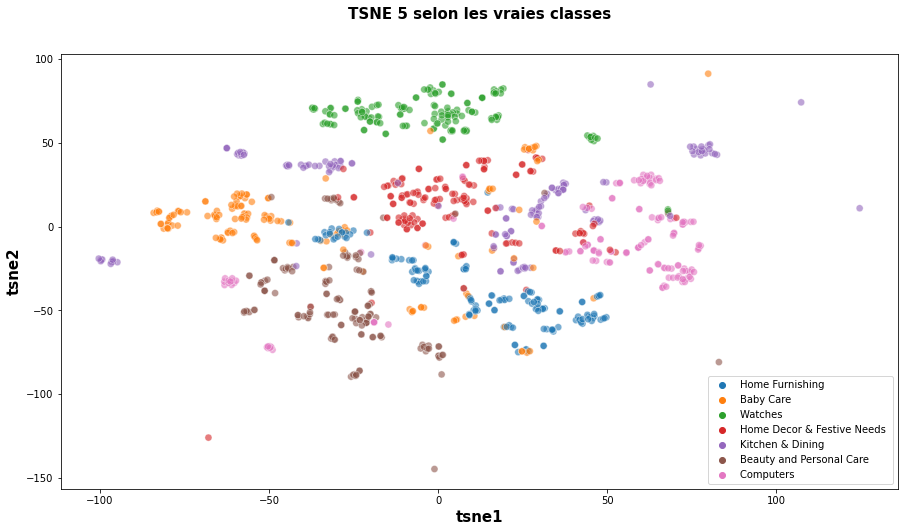

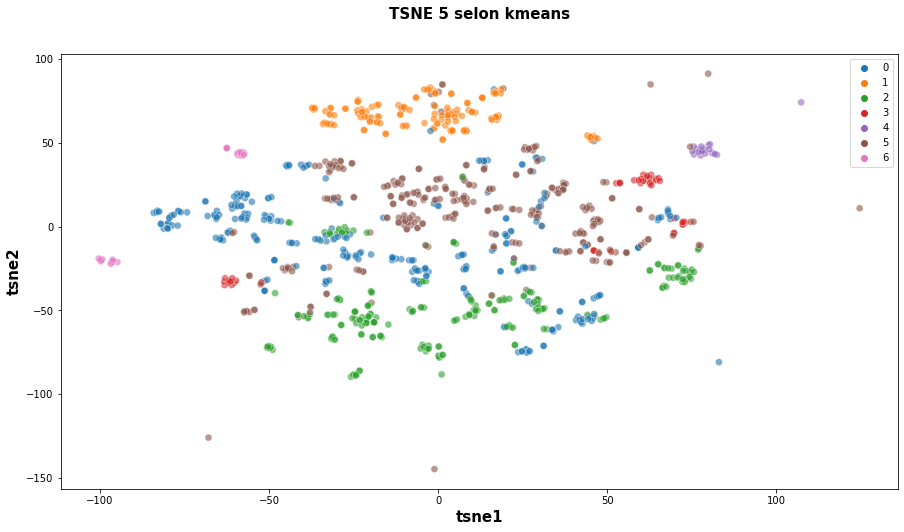

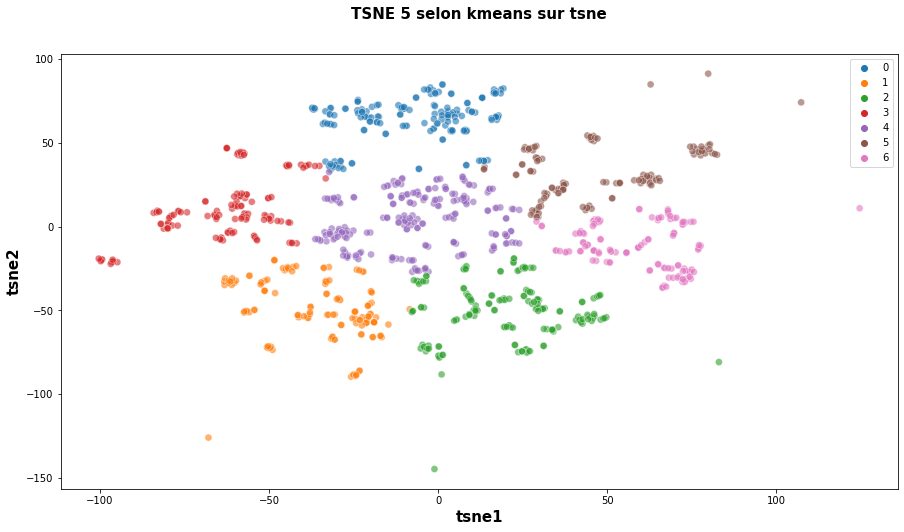

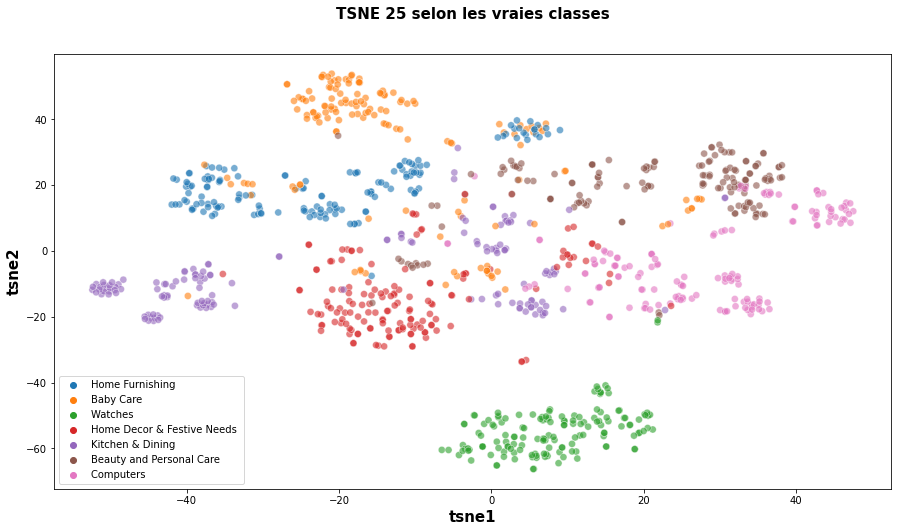

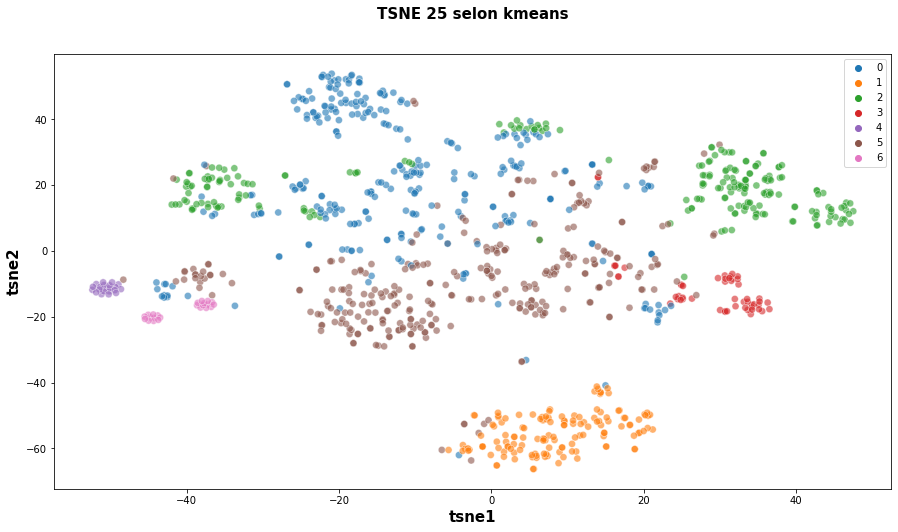

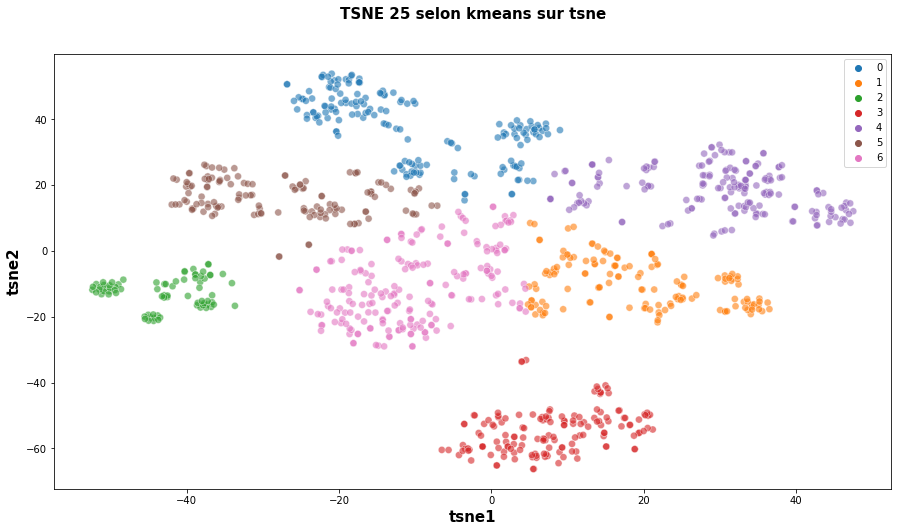

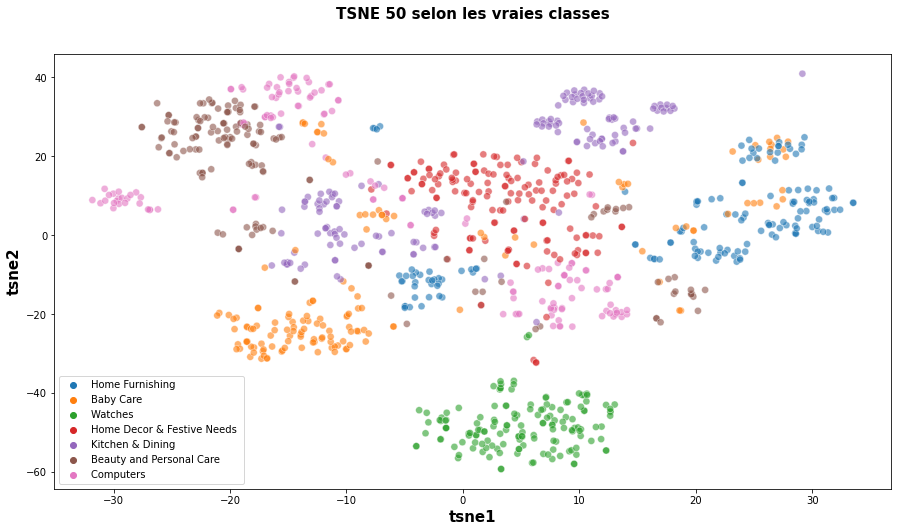

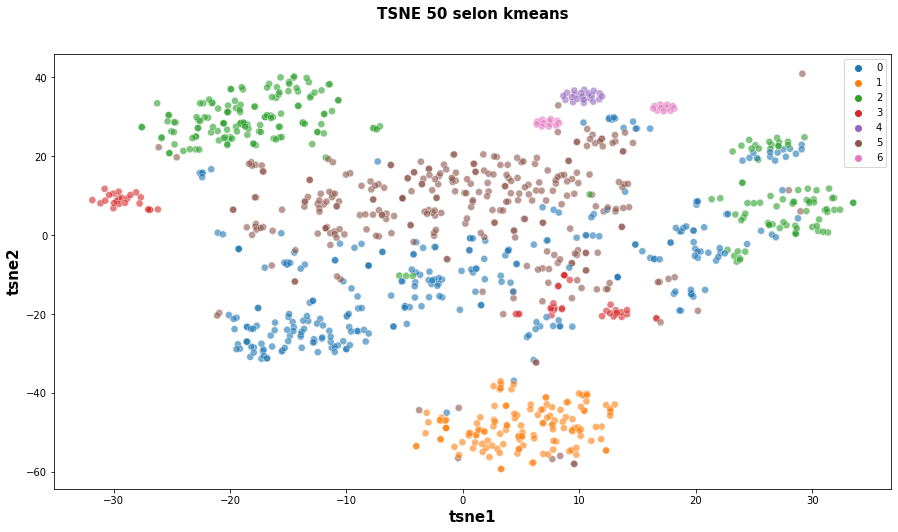

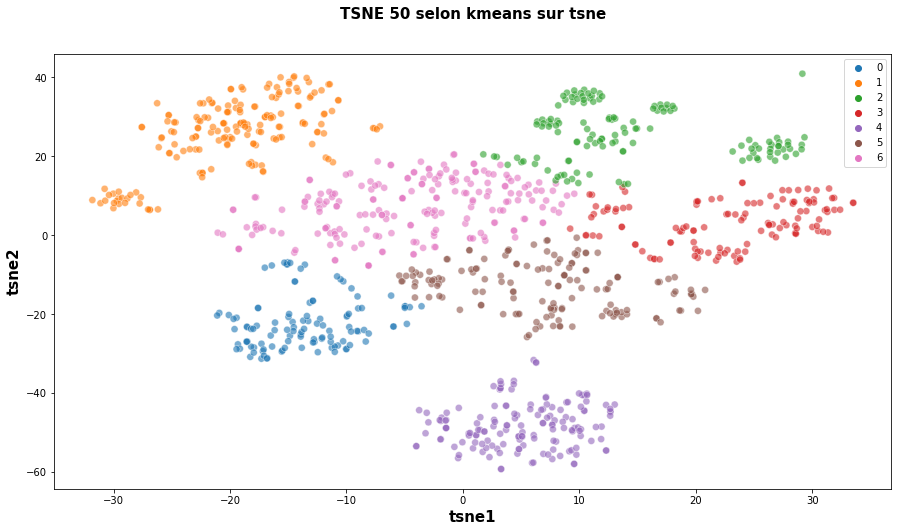

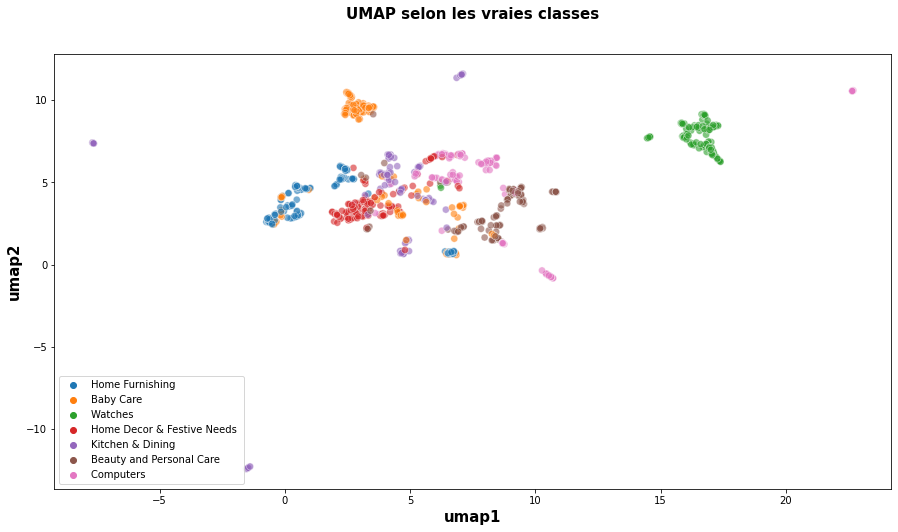

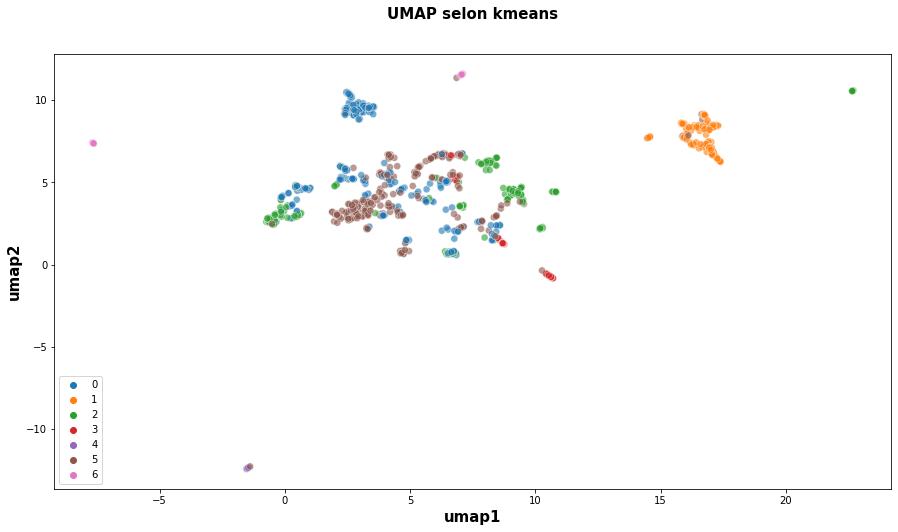

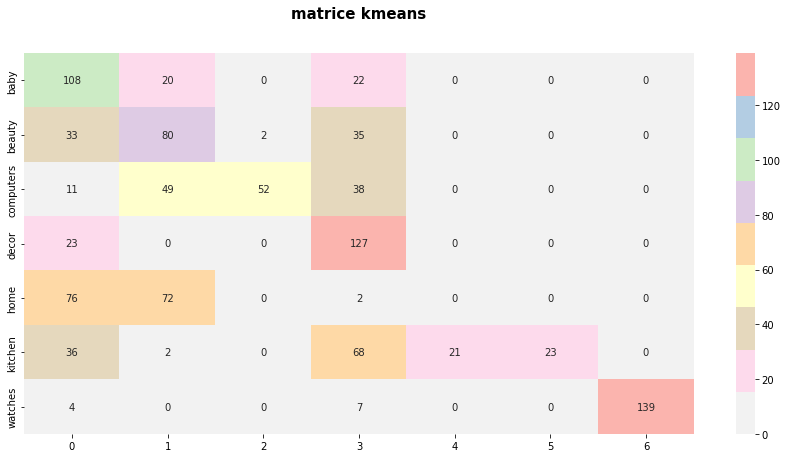

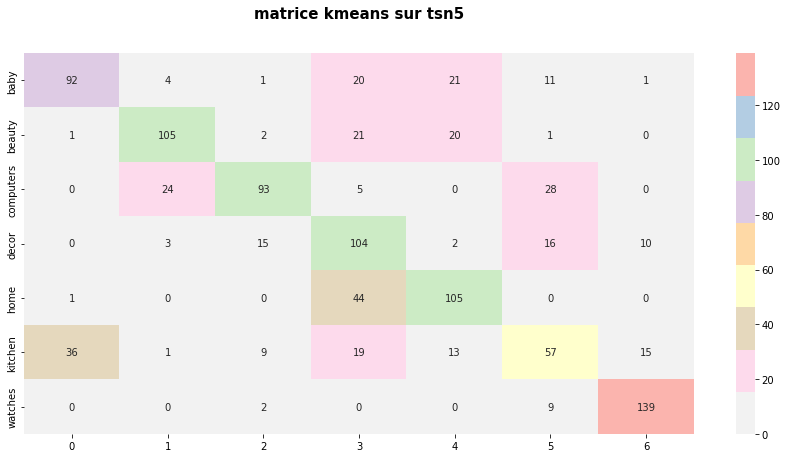

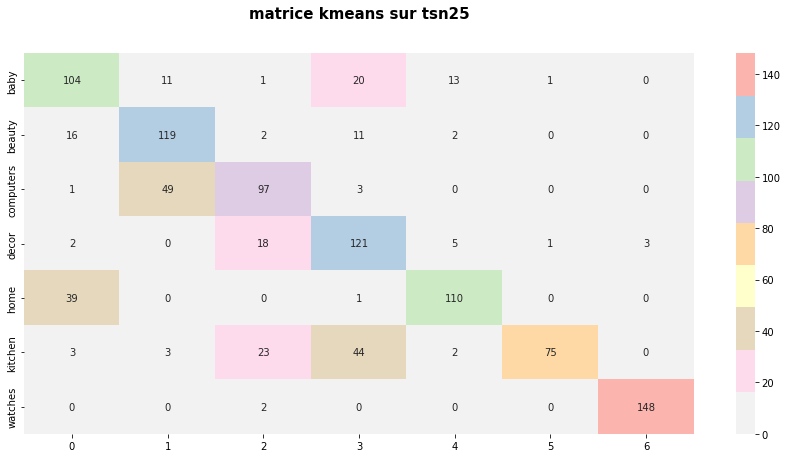

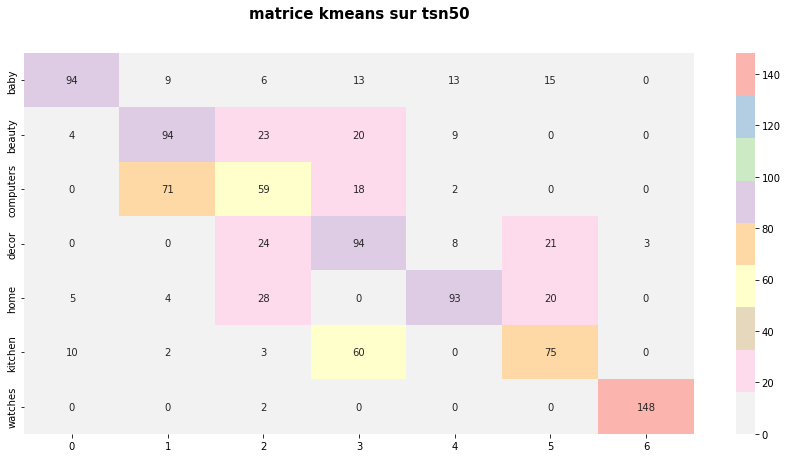

silhouette score :  0.04385154171635555
ARi score :  0.2757576727201792
ARi score tsne5 :  0.4124979405174666
ARi score tsne25 :  0.5225245847669191
ARi score tsne50 :  0.4037519026906928


In [104]:
X = data['final_text']
model = pipeline.fit(X)
X_pred = pipeline.transform(X)
result = (analyse(X_pred,"one_hot_Unigramme_final_text"))
df_result_tot = df_result_tot.append(result)

In [105]:
df_result_tot.sort_values(by = "ARI")

Model       ARI  kmeans silouette score  ARI_tsne5  \
0  one_hot_Unigramme_final_text  0.275758                0.043852   0.412498   

   ARI_tsne25  ARI_tsne50  
0    0.522525    0.403752

## Encodage One-HOT avec Bigramme  

### Encodage via bigramme des mots du corpus
### Reduction de dimension (conservation de 99% de la variance)
### Normalisation
### Segmentation par Kmeans

In [106]:
# create pipeline
pipeline = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2))),
                     ('to_array', FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)),
                     ('pca', pca),
                     ('scaler',  Normalizer()),
 ])

## Caracteristique de description

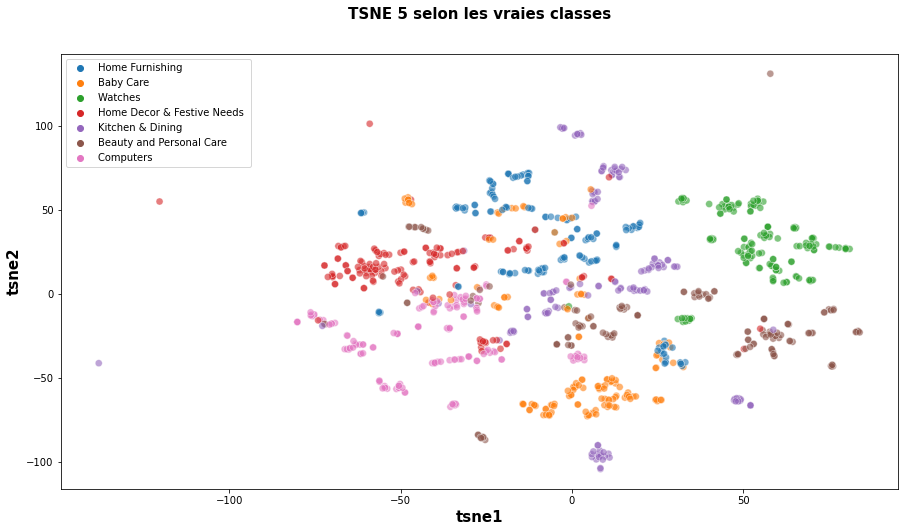

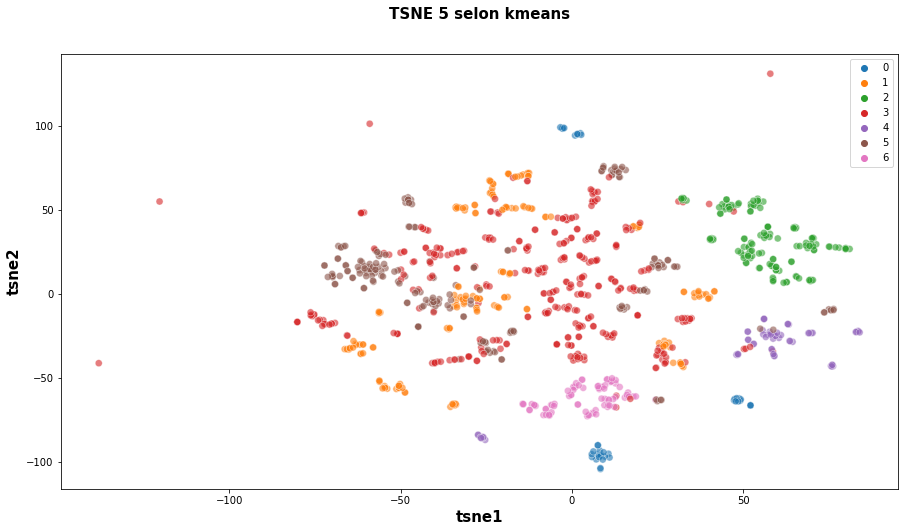

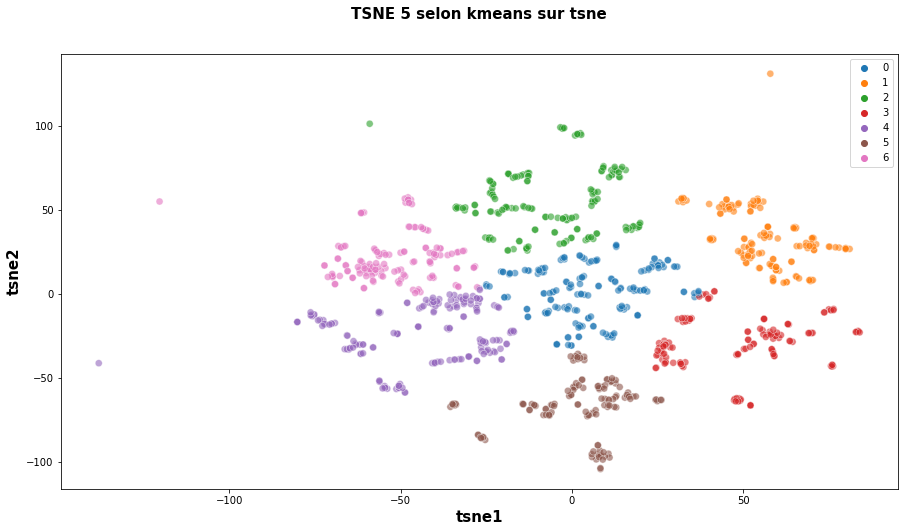

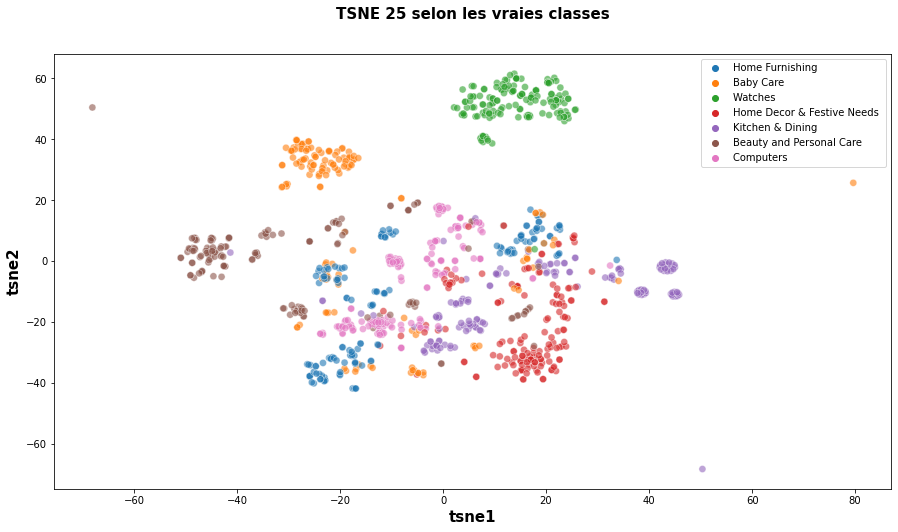

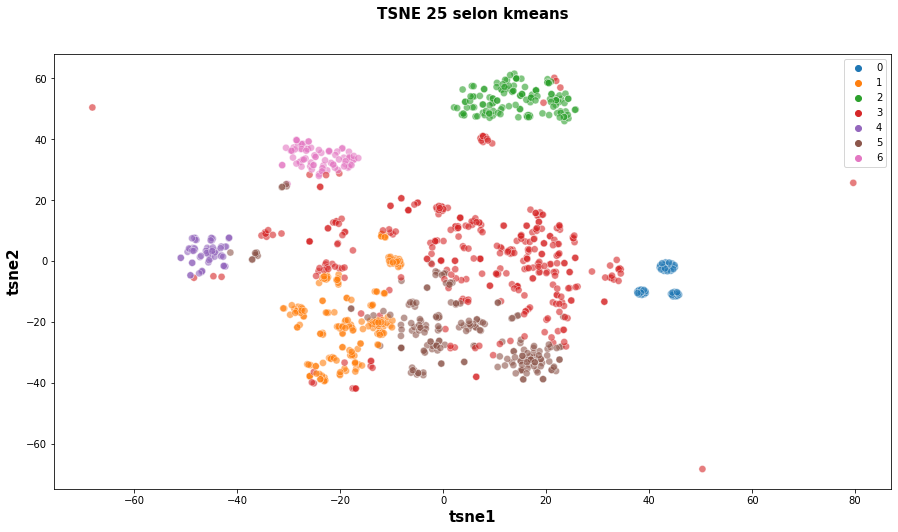

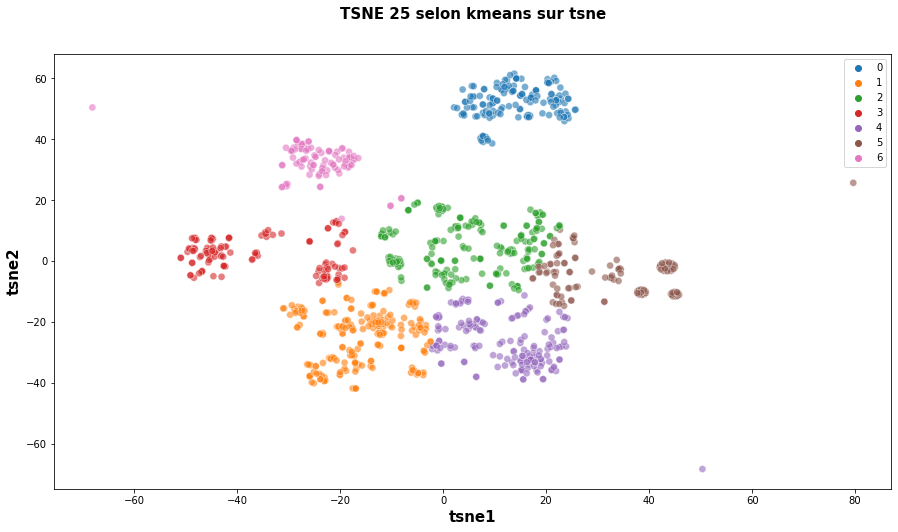

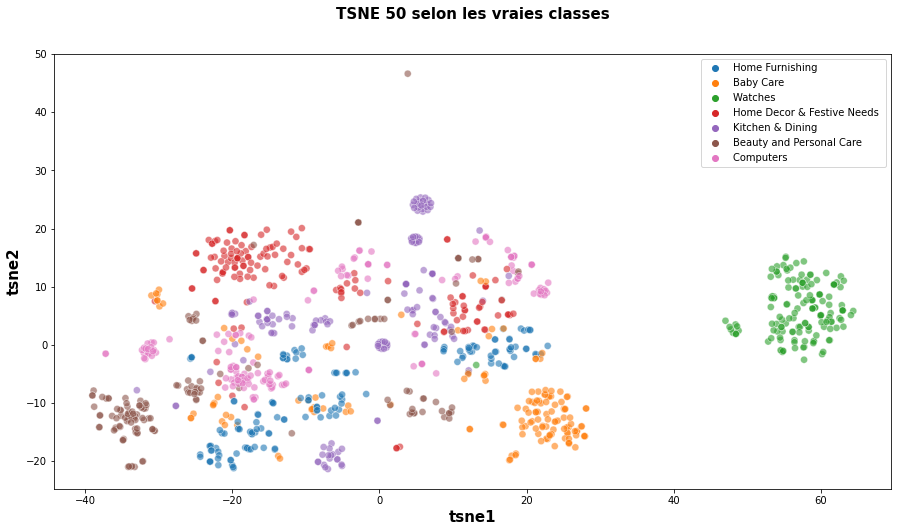

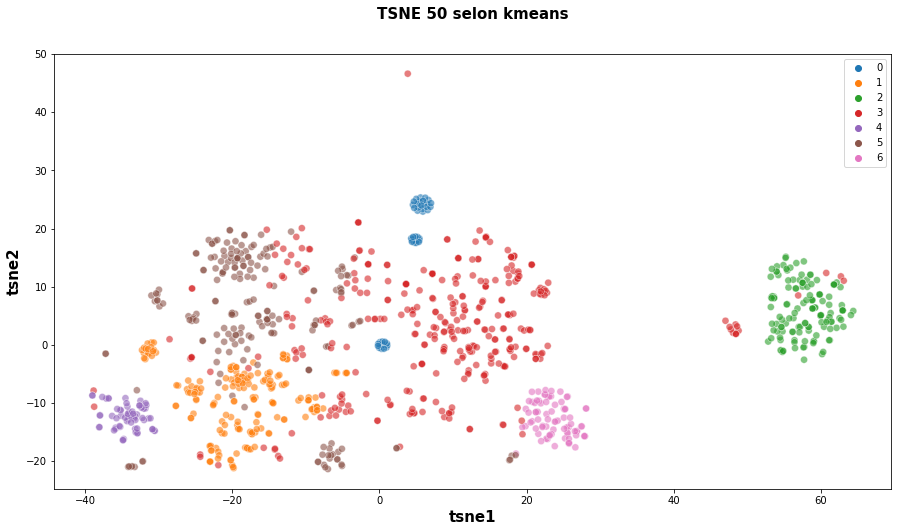

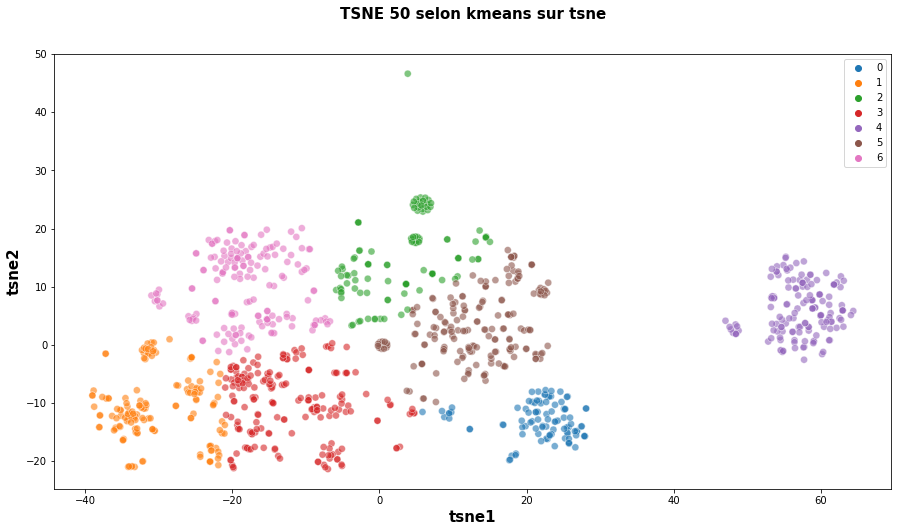

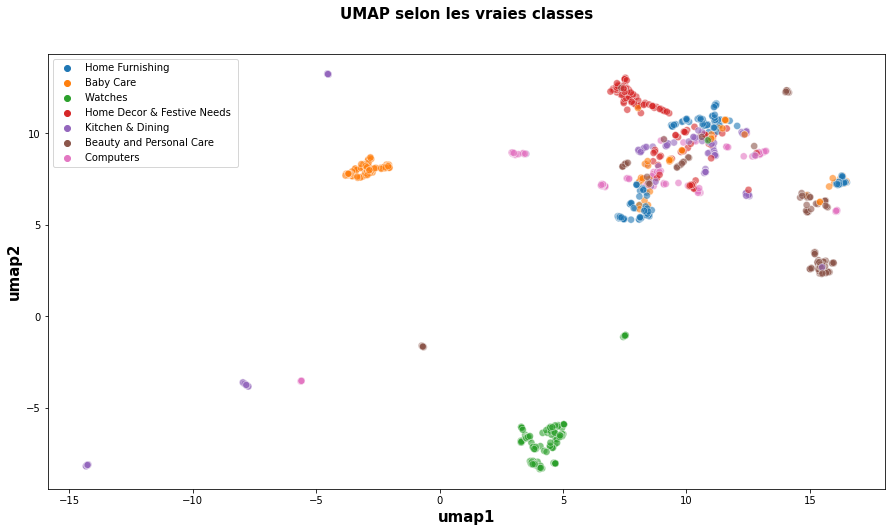

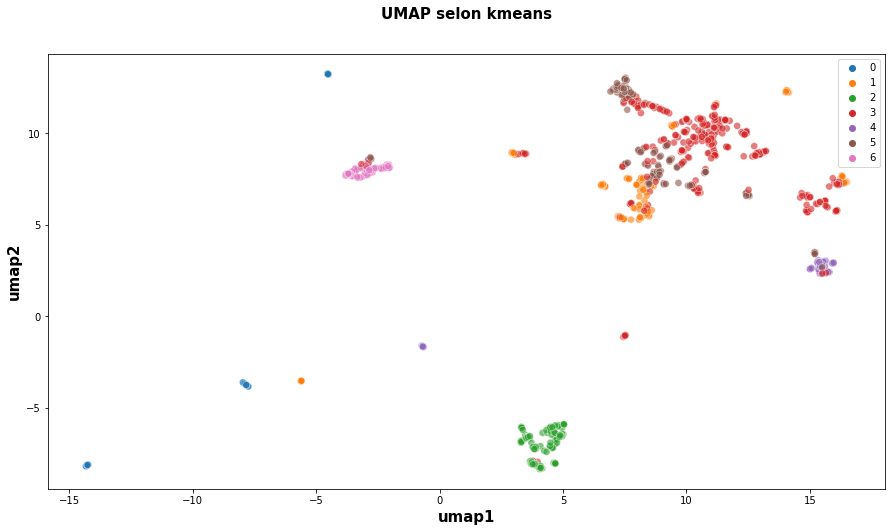

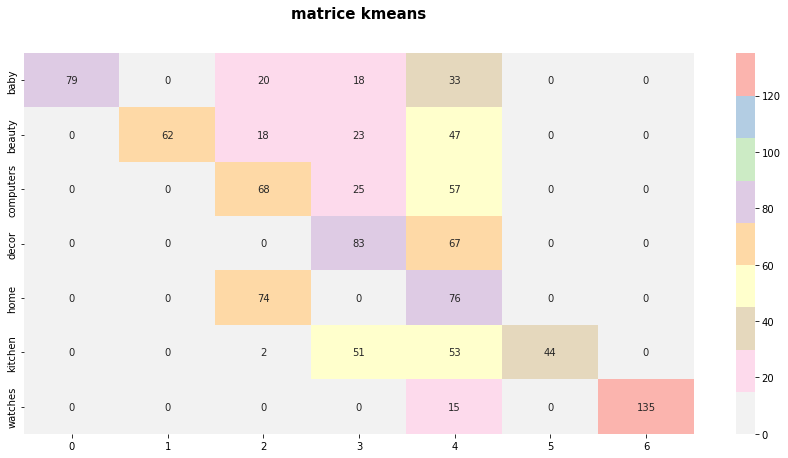

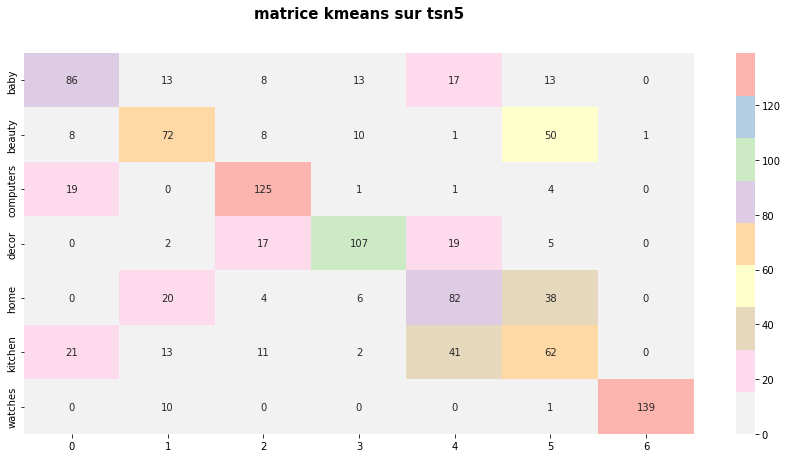

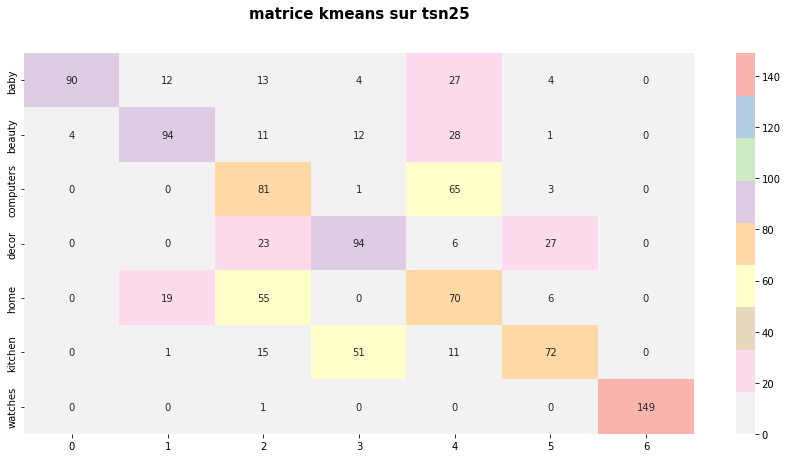

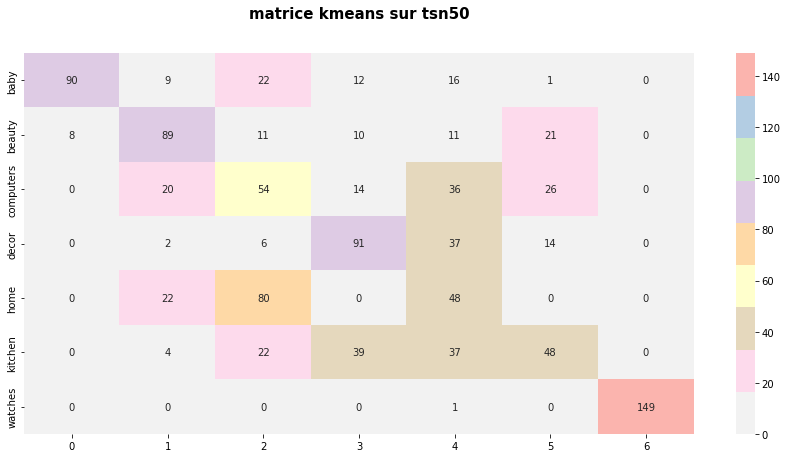

silhouette score :  0.06417792083725574
ARi score :  0.24717060755311582
ARi score tsne5 :  0.40781158367019826
ARi score tsne25 :  0.38981042155198903
ARi score tsne50 :  0.334858287083935


In [107]:
X = data['final_text']
model = pipeline.fit(X)
X_pred = pipeline.transform(X)
result = (analyse(X_pred,"one_hot_bigram_final_text"))
df_result_tot = df_result_tot.append(result)

In [108]:
df_result_tot.sort_values(by = "ARI")

Model       ARI  kmeans silouette score  ARI_tsne5  \
0     one_hot_bigram_final_text  0.247171                0.064178   0.407812   
0  one_hot_Unigramme_final_text  0.275758                0.043852   0.412498   

   ARI_tsne25  ARI_tsne50  
0    0.389810    0.334858  
0    0.522525    0.403752

In [109]:
## la sommaire des resultats des scores
df_result_tot

Model       ARI  kmeans silouette score  ARI_tsne5  \
0  one_hot_Unigramme_final_text  0.275758                0.043852   0.412498   
0     one_hot_bigram_final_text  0.247171                0.064178   0.407812   

   ARI_tsne25  ARI_tsne50  
0    0.522525    0.403752  
0    0.389810    0.334858